# Data Exploration
---
## Development Flow
![image CRISP-DM Flow](https://www.djkn.kemenkeu.go.id/files/images/2022/06/skema.jpg)

## Langkah-langkah
1. Membaca seluruh dataset
   - Load seluruh dataset dari folder `datasets`
   - Identifikasi id dan relasi data
2. Memeriksa ukuran dan duplikasi data
3. Bentuk dataset yang diperlukan
4. Cleaning data

In [70]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from prettytable import PrettyTable
import plotly.express as px

## 1. Load seluruh datasets

In [2]:
# read tables
dataset_names = [f for f in os.listdir('datasets') if not f.startswith('.')]
dataframes = {}

for dataset in dataset_names:
    dataset_name = dataset.split('.')[0]
    dataframes[dataset_name] = pd.read_csv(f'datasets/{dataset}')

# df_cycles = pd.read_csv('datasets/cycles.csv')
# df_farms = pd.read_csv('datasets/farms.csv')
# df_fasting = pd.read_csv('datasets/fasting.csv')
# df_fastings = pd.read_csv('datasets/fastings.csv')
# df_feed_tray = pd.read_csv('datasets/feed_tray.csv')
# df_feeds = pd.read_csv('datasets/feeds.csv')
# df_harvests = pd.read_csv('datasets/harvests.csv')
# df_measurements = pd.read_csv('datasets/measurements.csv')
# df_mortalities = pd.read_csv('datasets/mortalities.csv')
# df_ponds = pd.read_csv('datasets/ponds.csv')
# df_samplings = pd.read_csv('datasets/samplings.csv')

## 2. Observasi ukuran data, duplikasi data dan kelengkapan data

In [3]:
# plot missing value with heatmap chart
def plot_missin_data_heatmap(df, title):
    plt.figure(figsize=(10, 6))
    sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
    plt.title(title)
    plt.show()

# function formattng column data types
def format_data_types(df, data_types):
    """
    Fungsi untuk mengonversi tipe data dari kolom dalam DataFrame.

    :param df: DataFrame yang akan dikonversi.
    :param data_types: Dictionary yang menentukan kolom dan tipe data yang diinginkan.
                       Contoh: {'kolom1': 'str', 'kolom2': 'float', 'kolom3': 'int'}
    :return: DataFrame dengan tipe data yang sudah dikonversi.
    """
    for col, type_ in data_types.items():
        if col in df.columns:  # Cek jika kolom ada di DataFrame
            try:
                # Konversi tipe data
                df[col] = df[col].astype(type_)
            except ValueError as e:
                print(f"Error converting {col}: {e}")
    return df


### 2.1 Summary ukuran data

In [4]:
tbl = PrettyTable()
tbl.field_names = ['Dataset', 'Size', "Any Duplicated", "% Dupli"]

for dataset, df in dataframes.items():
    tbl.add_row([
        dataset, 
        df.shape, 
        df.duplicated().any(), 
        round(df.duplicated().sum() / df.shape[0] * 100, 2)
    ])

tbl


+--------------+--------------+----------------+---------+
|   Dataset    |     Size     | Any Duplicated | % Dupli |
+--------------+--------------+----------------+---------+
|  feed_tray   | (186664, 10) |     False      |   0.0   |
|   harvests   |  (8087, 9)   |     False      |   0.0   |
|    farms     |   (551, 4)   |     False      |   0.0   |
|    feeds     | (706908, 3)  |      True      |  21.93  |
|  samplings   |  (15032, 7)  |     False      |   0.0   |
|   fasting    |  (6189, 3)   |      True      |   1.08  |
| measurements | (139050, 24) |     False      |   0.0   |
|    cycles    |  (2617, 24)  |      True      |   1.91  |
|    ponds     |  (338, 10)   |     False      |   0.0   |
|   fastings   |  (32379, 3)  |      True      |   0.57  |
| mortalities  |  (13221, 7)  |     False      |   0.0   |
+--------------+--------------+----------------+---------+

In [5]:
data_types_feed_tray = {
    'logged_at': 'datetime64[ns]',
    'feed_logged_at': 'datetime64[ns]',
    'cycle_id': 'int64',
    "tray_number": "int64",
    'feed_remaining_percent': 'float',
    'created_at': 'datetime64[ns]',
    'updated_at': 'datetime64[ns]',
    'local_feed_logged_at': 'datetime64[ns]',
}

dataframes.update({
    "feed_tray": format_data_types(dataframes['feed_tray'], data_types_feed_tray)
})
dataframes['feed_tray'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186664 entries, 0 to 186663
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   id                      186664 non-null  int64         
 1   logged_at               186664 non-null  datetime64[ns]
 2   feed_logged_at          186664 non-null  datetime64[ns]
 3   cycle_id                186664 non-null  int64         
 4   tray_number             186664 non-null  int64         
 5   feed_remaining_percent  186664 non-null  float64       
 6   remark                  46381 non-null   object        
 7   created_at              186664 non-null  datetime64[ns]
 8   updated_at              186664 non-null  datetime64[ns]
 9   local_feed_logged_at    186664 non-null  datetime64[ns]
dtypes: datetime64[ns](5), float64(1), int64(3), object(1)
memory usage: 14.2+ MB


In [6]:
dataframes['harvests'].head()

cycle_id           updated_at    size           created_at  weight  \
0   15013.0  2022-07-18 08:42:59  399.86  2022-07-18 08:42:59    0.01   
1   11848.0  2021-10-25 23:29:53  300.00  2021-10-24 08:38:53   46.00   
2   11848.0  2021-10-25 23:29:35  300.00  2021-10-25 23:29:35   10.00   
3    4666.0  2020-10-08 02:07:18  110.00  2020-10-08 02:07:18  270.50   
4    4666.0  2020-10-08 02:07:37  190.00  2020-10-08 02:07:37  270.50   

        id harvested_at   status  selling_price  
0  11960.0   2022-04-17   Failed            NaN  
1   7520.0   2021-10-22     Full      1610000.0  
2   7546.0   2021-10-21  Partial       350000.0  
3   3009.0   2020-08-31   Failed            NaN  
4   3010.0   2020-08-31   Failed            NaN

In [7]:
data_types_harvests = {
    'cycle_id': 'int64',  # atau 'int32' jika nilai tidak terlalu besar
    'updated_at': 'datetime64[ns]',
    'size': 'float64',  # 'float' jika presisi default cukup
    'created_at': 'datetime64[ns]',
    'weight': 'float64',  # atau 'float32' untuk menghemat memori dengan presisi yang lebih rendah
    'id': 'int64',  # atau 'int32' jika nilai tidak terlalu besar
    'harvested_at': 'datetime64[ns]',
    'status': 'category',  # tipe 'category' efisien untuk string dengan jumlah kategori yang terbatas
    'selling_price': 'float64',  # atau 'float32' untuk menghemat memori dengan presisi yang lebih rendah
}

dataframes.update({
    "harvests": format_data_types(dataframes['harvests'], data_types_feed_tray)
})
dataframes['harvests'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8087 entries, 0 to 8086
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   cycle_id       8087 non-null   int64         
 1   updated_at     8087 non-null   datetime64[ns]
 2   size           8087 non-null   float64       
 3   created_at     8087 non-null   datetime64[ns]
 4   weight         8087 non-null   float64       
 5   id             8087 non-null   float64       
 6   harvested_at   8087 non-null   object        
 7   status         7824 non-null   object        
 8   selling_price  6294 non-null   float64       
dtypes: datetime64[ns](2), float64(4), int64(1), object(2)
memory usage: 568.7+ KB


In [8]:
dataframes['farms'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 551 entries, 0 to 550
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        551 non-null    int64 
 1   province  479 non-null    object
 2   regency   458 non-null    object
 3   timezone  551 non-null    object
dtypes: int64(1), object(3)
memory usage: 17.3+ KB


In [9]:
dataframes['feeds'].head()

cycle_id                logged_at  quantity
0     15013  2022-03-29 00:00:00.000       0.5
1     15013  2022-03-29 05:30:00.000       0.5
2     15013  2022-03-29 11:30:00.000       0.5
3     15013  2022-03-29 14:30:00.000       0.5
4     15013  2022-03-30 00:00:00.000       0.5

In [10]:
data_types_feeds = {
    'logged_at': 'datetime64[ns]'
}

dataframes.update({
    "feeds": format_data_types(dataframes['feeds'], data_types_feed_tray)
})
dataframes['feeds'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 706908 entries, 0 to 706907
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   cycle_id   706908 non-null  int64         
 1   logged_at  706887 non-null  datetime64[ns]
 2   quantity   706887 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 16.2 MB


In [11]:
dataframes['samplings'].head()

cycle_id           updated_at  sampled_at           created_at  \
0   18747.0  2022-10-07 03:26:30  2022-09-24  2022-10-07 02:10:49   
1   18747.0  2022-10-07 03:27:27  2022-10-01  2022-10-07 03:27:27   
2   18747.0  2022-10-08 01:30:56  2022-10-08  2022-10-08 01:30:56   
3   18747.0  2022-10-15 03:24:26  2022-10-15  2022-10-15 03:24:26   
4   27095.0  2023-11-05 09:03:39  2023-10-07  2023-11-05 09:03:39   

   average_weight       id                                             remark  
0            4.91  32508.0  Size 204\nP/H = 99 kg\nP/K = 2.020 kg\nSamplin...  
1            7.12  32534.0  Size 140\nADG = 0,31\nP/H = 139 kg\nP/K = 2.88...  
2            9.75  32575.0  Size 103\nADG = 0,38\nP/H = 160 kg\nP/K = 3.94...  
3           11.15  32864.0  Size 90\nADG 0,23\nP/H = 180 kg\nP/K = 5.149 k...  
4            4.79  52037.0                                                NaN

In [12]:
data_types_samplings = {
    'cycle_id': 'int64',
    'updated_at': 'datetime64[ns]',
    'sampled_at': 'datetime64[ns]',
    'created_at': 'datetime64[ns]',
    'average_weight': 'float',
    'id': 'int64'
}
dataframes.update({
    'samplings': format_data_types(dataframes['samplings'], data_types_samplings)
})
dataframes['samplings'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15032 entries, 0 to 15031
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   cycle_id        15032 non-null  int64         
 1   updated_at      15032 non-null  datetime64[ns]
 2   sampled_at      15032 non-null  datetime64[ns]
 3   created_at      15032 non-null  datetime64[ns]
 4   average_weight  15032 non-null  float64       
 5   id              15032 non-null  int64         
 6   remark          1339 non-null   object        
dtypes: datetime64[ns](3), float64(1), int64(2), object(1)
memory usage: 822.2+ KB


In [13]:
dataframes.update({
    'combined_fastings': pd.concat([dataframes['fasting'], dataframes['fastings']], ignore_index=True)
})
dataframes['combined_fastings'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38568 entries, 0 to 38567
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   logged_date  38568 non-null  object 
 1   cycle_id     38568 non-null  float64
 2   fasting      38511 non-null  float64
dtypes: float64(2), object(1)
memory usage: 904.1+ KB


In [14]:
data_types_fastings = {
    'logged_date': 'datetime64[ns]'
}
dataframes.update({
    'combined_fastings': format_data_types(dataframes['combined_fastings'], data_types_fastings)
})
dataframes['combined_fastings'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38568 entries, 0 to 38567
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   logged_date  38568 non-null  datetime64[ns]
 1   cycle_id     38568 non-null  float64       
 2   fasting      38511 non-null  float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 904.1 KB


In [15]:
dataframes['combined_fastings'].head()

logged_date  cycle_id  fasting
0  2022-10-17   15804.0      1.0
1  2022-11-27   15804.0      0.0
2  2022-11-28   15804.0      0.0
3  2022-11-29   15804.0      0.0
4  2022-12-01   15804.0      1.0

In [16]:
dataframes['measurements'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139050 entries, 0 to 139049
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   pond_id              139050 non-null  int64  
 1   cycle_id             139050 non-null  int64  
 2   measured_date        139050 non-null  object 
 3   morning_temperature  97195 non-null   float64
 4   evening_temperature  89211 non-null   float64
 5   morning_do           77726 non-null   float64
 6   evening_do           73952 non-null   float64
 7   morning_salinity     92662 non-null   float64
 8   evening_salinity     65093 non-null   float64
 9   morning_pH           118935 non-null  float64
 10  evening_pH           60949 non-null   float64
 11  transparency         77300 non-null   float64
 12  turbidity            166 non-null     float64
 13  ammonia              3748 non-null    float64
 14  nitrate              2162 non-null    float64
 15  nitrite          

In [17]:
data_type_measurements={
    'measured_date': 'datetime64[ns]'
}
dataframes.update({
    'measurements': format_data_types(dataframes['measurements'], data_type_measurements)
})
dataframes['measurements'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139050 entries, 0 to 139049
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   pond_id              139050 non-null  int64         
 1   cycle_id             139050 non-null  int64         
 2   measured_date        139050 non-null  datetime64[ns]
 3   morning_temperature  97195 non-null   float64       
 4   evening_temperature  89211 non-null   float64       
 5   morning_do           77726 non-null   float64       
 6   evening_do           73952 non-null   float64       
 7   morning_salinity     92662 non-null   float64       
 8   evening_salinity     65093 non-null   float64       
 9   morning_pH           118935 non-null  float64       
 10  evening_pH           60949 non-null   float64       
 11  transparency         77300 non-null   float64       
 12  turbidity            166 non-null     float64       
 13  ammonia       

In [18]:
dataframes['cycles'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2617 entries, 0 to 2616
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      2617 non-null   int64  
 1   pond_id                 2617 non-null   int64  
 2   species_id              1803 non-null   float64
 3   total_seed              2617 non-null   int64  
 4   started_at              2617 non-null   object 
 5   finished_at             2616 non-null   object 
 6   remark                  1336 non-null   object 
 7   created_at              2617 non-null   object 
 8   updated_at              2617 non-null   object 
 9   area                    2617 non-null   float64
 10  initial_age             2569 non-null   float64
 11  limit_weight_per_area   2610 non-null   float64
 12  target_cultivation_day  2614 non-null   float64
 13  target_size             2613 non-null   float64
 14  extracted_at            2617 non-null   

In [19]:
dataframes['cycles'].head()

id  pond_id  species_id  total_seed               started_at  \
0  18876    36294         1.0      331920  2022-10-14 00:00:00.000   
1  22118    37102         1.0       40000  2023-04-26 00:00:00.000   
2  24088    39154         NaN      357570  2023-08-01 00:00:00.000   
3  17743    20914         1.0      168275  2022-07-19 00:00:00.000   
4  17125    34187         1.0      188000  2022-07-07 00:00:00.000   

               finished_at                  remark               created_at  \
0  2023-01-29 00:00:00.000                     NaN  2022-10-14 12:34:23.000   
1  2023-06-23 00:00:00.000                  #TBR01  2023-04-30 22:28:13.000   
2  2023-10-18 00:00:00.000             #SiklusFarm  2023-07-12 01:13:05.000   
3  2022-09-29 00:00:00.000  #SiklusCustomerPermadi  2022-08-14 04:40:46.000   
4  2022-09-20 00:00:00.000            #SiklusTebar  2022-07-12 00:24:30.000   

                updated_at    area  ...             extracted_at  \
0  2023-01-30 01:46:27.000  4030.0  ...  2024-04-12 17:02:22.000   
1  2023-06-26 05:35:32.000   399.0  ...  2024-04-12 17:02:22.000   
2  2023-10-19 04:23:11.000  2000.0  ...  2024-04-12 17:02:22.000   
3  2022-10-06 00:09:36.000  1512.0  ...  2024-04-12 17:02:22.000   
4  2022-10-15 04:27:24.000  1225.0  ...  2024-04-12 17:02:22.000   

   subscription_type               ordered_at  hatchery_id total_seed_type  \
0               Free                      NaN         66.0             net   
1               Free                      NaN         83.0             net   
2               Free  2023-07-12 01:13:05.000       1004.0           gross   
3               Free                      NaN          3.0          actual   
4               Free  2022-07-12 00:24:30.000         35.0             net   

                                  hatchery_name pond_name  pond_length  \
0                          UD. Benur Ndaru Laut         H         65.0   
1                                 CV Raja Benur        A1         30.0   
2  PT. Tri Karta Pratama - Total Kualitas Prima        A3         50.0   
3                 PT. Central Proteinaprima Tbk        B4         54.0   
4                         PT Windu Alam Sentosa         A         35.0   

  pond_width pond_depth  
0       62.0        1.0  
1       20.0        1.0  
2       40.0        1.4  
3       28.0        1.5  
4       35.0        1.2  

[5 rows x 24 columns]

In [20]:
data_type_cycles = {
    'started_at': 'datetime64[ns]',
    'finished_at': 'datetime64[ns]',
    'species_id': 'category',
    'created_at': 'datetime64[ns]',
    'updated_at': 'datetime64[ns]',
    'extracted_at': 'datetime64[ns]',
    'ordered_at': 'datetime64[ns]',
    'total_seed_type': 'category',
}

dataframes.update({
    'cycles': format_data_types(dataframes['cycles'], data_type_cycles)
})
dataframes['cycles'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2617 entries, 0 to 2616
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   id                      2617 non-null   int64         
 1   pond_id                 2617 non-null   int64         
 2   species_id              1803 non-null   category      
 3   total_seed              2617 non-null   int64         
 4   started_at              2617 non-null   datetime64[ns]
 5   finished_at             2616 non-null   datetime64[ns]
 6   remark                  1336 non-null   object        
 7   created_at              2617 non-null   datetime64[ns]
 8   updated_at              2617 non-null   datetime64[ns]
 9   area                    2617 non-null   float64       
 10  initial_age             2569 non-null   float64       
 11  limit_weight_per_area   2610 non-null   float64       
 12  target_cultivation_day  2614 non-null   float64 

In [21]:
dataframes['ponds'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338 entries, 0 to 337
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                338 non-null    int64  
 1   farm_id           338 non-null    int64  
 2   length            315 non-null    float64
 3   width             309 non-null    float64
 4   deep              246 non-null    float64
 5   created_at        338 non-null    object 
 6   updated_at        338 non-null    object 
 7   record_id         338 non-null    object 
 8   extracted_at      338 non-null    object 
 9   max_seed_density  135 non-null    float64
dtypes: float64(4), int64(2), object(4)
memory usage: 26.5+ KB


In [22]:
dataframes['ponds'].head()

id  farm_id  length  width  deep               created_at  \
0  2117        8     NaN    NaN   NaN  2018-04-19 20:09:43.000   
1     9        3    16.7   36.2   NaN  2018-03-07 19:05:09.000   
2  2116        8     NaN    NaN   NaN  2018-04-19 20:09:43.000   
3     7        3    46.5   32.6   1.1  2018-03-07 19:05:09.000   
4     8        3    48.5   33.0   1.1  2018-03-07 19:05:09.000   

                updated_at              record_id             extracted_at  \
0  2018-04-19 20:09:43.000  ponds_2023_12_21_2117  2023-12-21 17:02:10.000   
1  2018-03-15 00:58:08.000      ponds_2024_4_12_9  2024-04-12 17:02:11.000   
2  2018-04-19 20:09:43.000  ponds_2023_12_21_2116  2023-12-21 17:02:10.000   
3  2018-03-15 00:51:55.000      ponds_2024_4_12_7  2024-04-12 17:02:11.000   
4  2022-05-28 13:31:07.000      ponds_2024_4_12_8  2024-04-12 17:02:11.000   

   max_seed_density  
0               NaN  
1               NaN  
2               NaN  
3        131.926121  
4        124.921924

In [23]:
data_type_ponds = {
    'created_at': 'datetime64[ns]',
    'updated_at': 'datetime64[ns]',
    'extracted_at': 'datetime64[ns]'
}
dataframes.update({
    'ponds': format_data_types(dataframes['ponds'], data_type_ponds)
})
dataframes['ponds'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338 entries, 0 to 337
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                338 non-null    int64         
 1   farm_id           338 non-null    int64         
 2   length            315 non-null    float64       
 3   width             309 non-null    float64       
 4   deep              246 non-null    float64       
 5   created_at        338 non-null    datetime64[ns]
 6   updated_at        338 non-null    datetime64[ns]
 7   record_id         338 non-null    object        
 8   extracted_at      338 non-null    datetime64[ns]
 9   max_seed_density  135 non-null    float64       
dtypes: datetime64[ns](3), float64(4), int64(2), object(1)
memory usage: 26.5+ KB


In [24]:
dataframes['mortalities'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13221 entries, 0 to 13220
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              13221 non-null  int64  
 1   cycle_id        13221 non-null  int64  
 2   quantity        13221 non-null  int64  
 3   recorded_at     13221 non-null  object 
 4   created_at      13221 non-null  object 
 5   updated_at      13221 non-null  object 
 6   average_weight  13221 non-null  float64
dtypes: float64(1), int64(3), object(3)
memory usage: 723.1+ KB


In [25]:
data_type_mortalities = {
    'recorded_at': 'datetime64[ns]',
    'created_at': 'datetime64[ns]',
    'updated_at': 'datetime64[ns]'
}

dataframes.update({
    'mortalities': format_data_types(dataframes['mortalities'], data_type_mortalities)
})
dataframes['mortalities'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13221 entries, 0 to 13220
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              13221 non-null  int64         
 1   cycle_id        13221 non-null  int64         
 2   quantity        13221 non-null  int64         
 3   recorded_at     13221 non-null  datetime64[ns]
 4   created_at      13221 non-null  datetime64[ns]
 5   updated_at      13221 non-null  datetime64[ns]
 6   average_weight  13221 non-null  float64       
dtypes: datetime64[ns](3), float64(1), int64(3)
memory usage: 723.1 KB


In [26]:
origin_dataframes = dataframes.copy()

In [27]:
# dataframes = {}
# dataframes = {k: v for k, v in origin_dataframes.items() if (k != 'fastings' or k!='fasting')}
dataframes.pop('fasting')
dataframes.pop('fastings')

logged_date  cycle_id  fasting
0      2022-03-26   15013.0      1.0
1      2022-03-27   15013.0      0.0
2      2022-03-28   15013.0      0.0
3      2022-04-10   15013.0      1.0
4      2021-10-23   11848.0      1.0
...           ...       ...      ...
32374  2024-01-02   28500.0      1.0
32375  2024-01-02   28500.0      0.0
32376  2023-08-07   24650.0      1.0
32377  2023-09-06   24650.0      1.0
32378  2023-08-06   24650.0      1.0

[32379 rows x 3 columns]

In [28]:
origin_dataframes.keys(), dataframes.keys()

(dict_keys(['feed_tray', 'harvests', 'farms', 'feeds', 'samplings', 'fasting', 'measurements', 'cycles', 'ponds', 'fastings', 'mortalities', 'combined_fastings']),
 dict_keys(['feed_tray', 'harvests', 'farms', 'feeds', 'samplings', 'measurements', 'cycles', 'ponds', 'mortalities', 'combined_fastings']))

In [29]:
tbl = PrettyTable()
tbl.field_names = ['Dataset', 'Column', "Any Duplicated", "% Dupli"]

for dataset, df in dataframes.items():
    tbl.add_row([
        dataset,
        df.shape, 
        df.duplicated().any(), 
        round(df.duplicated().sum() / df.shape[0] * 100, 2)
    ])

tbl

+-------------------+--------------+----------------+---------+
|      Dataset      |    Column    | Any Duplicated | % Dupli |
+-------------------+--------------+----------------+---------+
|     feed_tray     | (186664, 10) |     False      |   0.0   |
|      harvests     |  (8087, 9)   |     False      |   0.0   |
|       farms       |   (551, 4)   |     False      |   0.0   |
|       feeds       | (706908, 3)  |      True      |  21.93  |
|     samplings     |  (15032, 7)  |     False      |   0.0   |
|    measurements   | (139050, 24) |     False      |   0.0   |
|       cycles      |  (2617, 24)  |      True      |   1.91  |
|       ponds       |  (338, 10)   |     False      |   0.0   |
|    mortalities    |  (13221, 7)  |     False      |   0.0   |
| combined_fastings |  (38568, 3)  |      True      |   1.19  |
+-------------------+--------------+----------------+---------+

### 2.2 Cek duplikasi data

In [30]:
for dataset, df in dataframes.items():
    # dupl check
    if df.duplicated().any():
        dataframes.update({
            dataset: df.drop_duplicates()
        })
        print(f"data duplikat pada dataset {dataset} terhapus")

data duplikat pada dataset feeds terhapus
data duplikat pada dataset cycles terhapus
data duplikat pada dataset combined_fastings terhapus


In [31]:
# cek dataset sudah bersih dari data duplikat
tbl = PrettyTable()
tbl.field_names = ['Dataset', 'Size', "Any Duplicated", "% Dupli"]

for dataset, df in dataframes.items():
    tbl.add_row([
        dataset, 
        df.shape, 
        df.duplicated().any(), 
        round(df.duplicated().sum() / df.shape[0] * 100, 2)
    ])

tbl

+-------------------+--------------+----------------+---------+
|      Dataset      |     Size     | Any Duplicated | % Dupli |
+-------------------+--------------+----------------+---------+
|     feed_tray     | (186664, 10) |     False      |   0.0   |
|      harvests     |  (8087, 9)   |     False      |   0.0   |
|       farms       |   (551, 4)   |     False      |   0.0   |
|       feeds       | (551913, 3)  |     False      |   0.0   |
|     samplings     |  (15032, 7)  |     False      |   0.0   |
|    measurements   | (139050, 24) |     False      |   0.0   |
|       cycles      |  (2567, 24)  |     False      |   0.0   |
|       ponds       |  (338, 10)   |     False      |   0.0   |
|    mortalities    |  (13221, 7)  |     False      |   0.0   |
| combined_fastings |  (38108, 3)  |     False      |   0.0   |
+-------------------+--------------+----------------+---------+

In [32]:
dataframes['combined_fastings'].head()

logged_date  cycle_id  fasting
0  2022-10-17   15804.0      1.0
1  2022-11-27   15804.0      0.0
2  2022-11-28   15804.0      0.0
3  2022-11-29   15804.0      0.0
4  2022-12-01   15804.0      1.0

## 3 Completeness datasets
- seleksi cepat fitur yang tidak diperlukan secara langsung seperti `created_at, updated_at etc.`
- melihat dengan hati-hati fitur yang memiliki null value tinggi 

In [33]:
# dynamic distribution plot
def plot_distribution(dataframe, nrows=2, ncols=2):
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 5 * nrows))
    axes = axes.flatten()  # Flatten jika array multidimensi
    columns = dataframe.columns
    
    for ax, column in zip(axes, columns):
        if dataframe[column].dtype in ['int64', 'float64']:  # Untuk kolom numerik
            sns.histplot(dataframe[column], bins=30, kde=True, ax=ax)
        else:  # Untuk kolom non-numerik
            sns.countplot(y=column, data=dataframe, ax=ax)
        ax.set_title(f'Distribution of {column}')
        ax.set_xlabel('')
        ax.set_ylabel('')
    
    # Jika ada subplot yang tidak digunakan, sembunyikan
    for ax in axes[len(columns):]:
        ax.axis('off')
    
    plt.tight_layout()
    plt.show()


In [34]:
dataframes.keys()

dict_keys(['feed_tray', 'harvests', 'farms', 'feeds', 'samplings', 'measurements', 'cycles', 'ponds', 'mortalities', 'combined_fastings'])

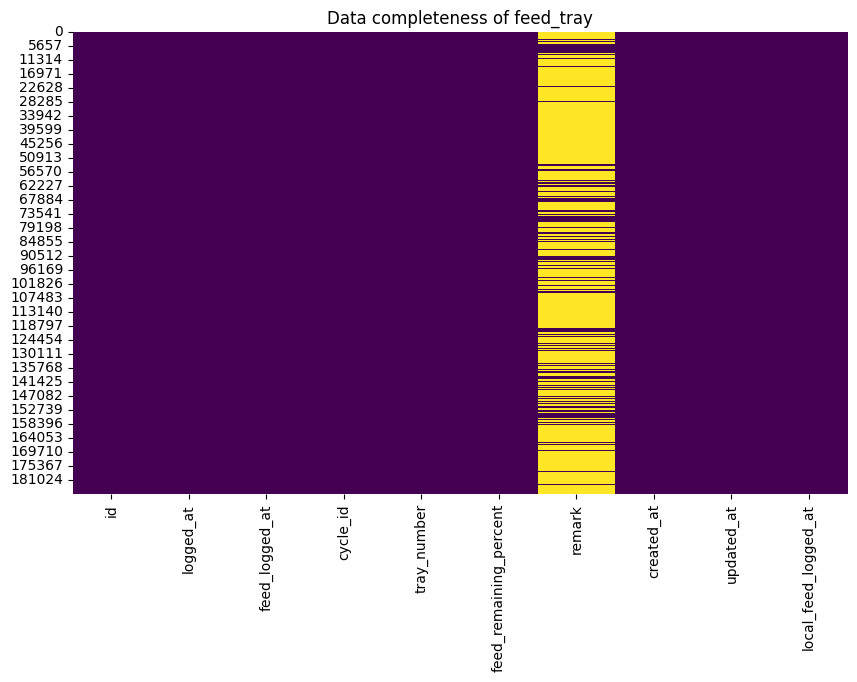

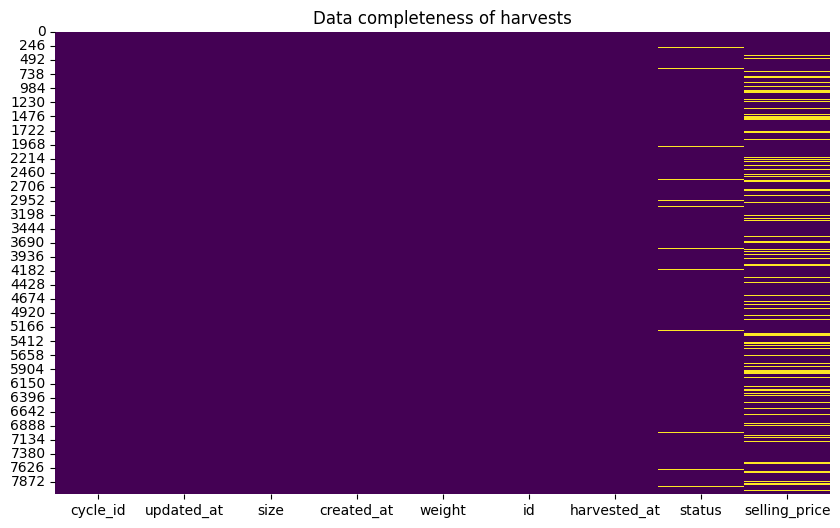

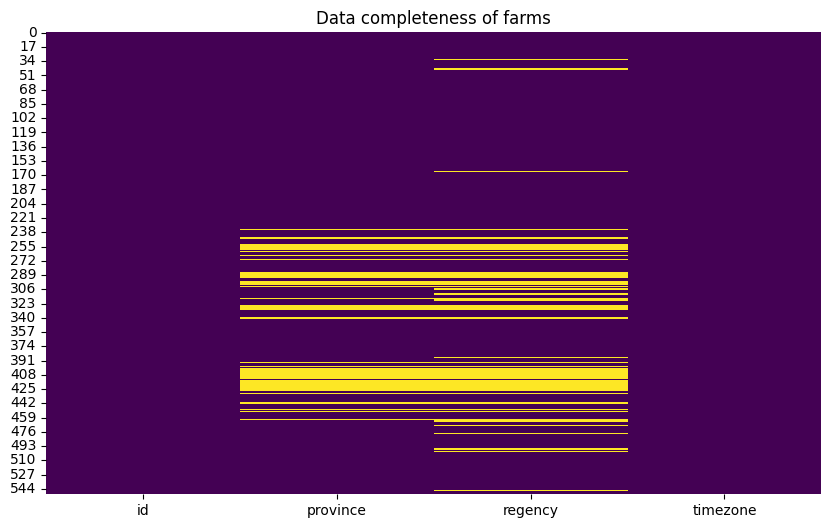

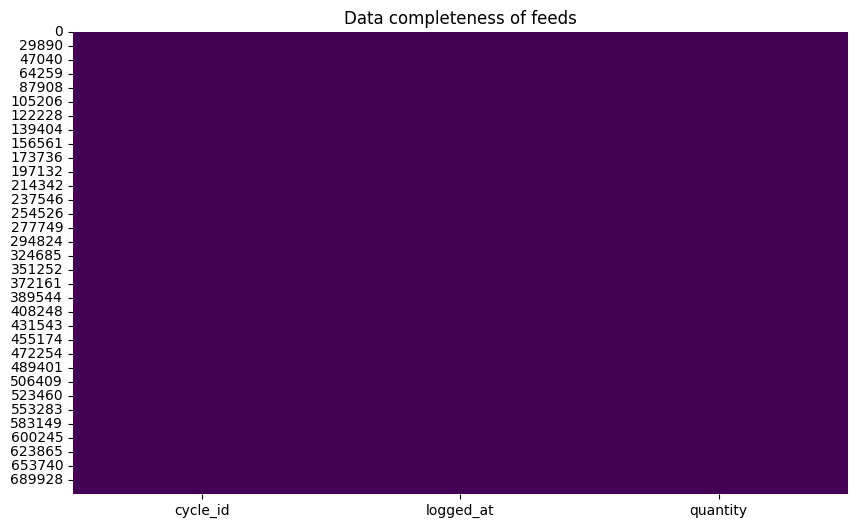

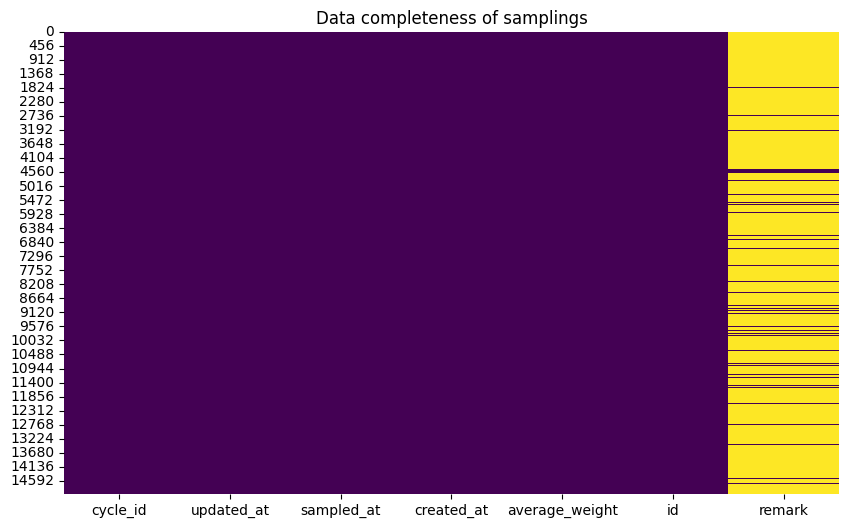

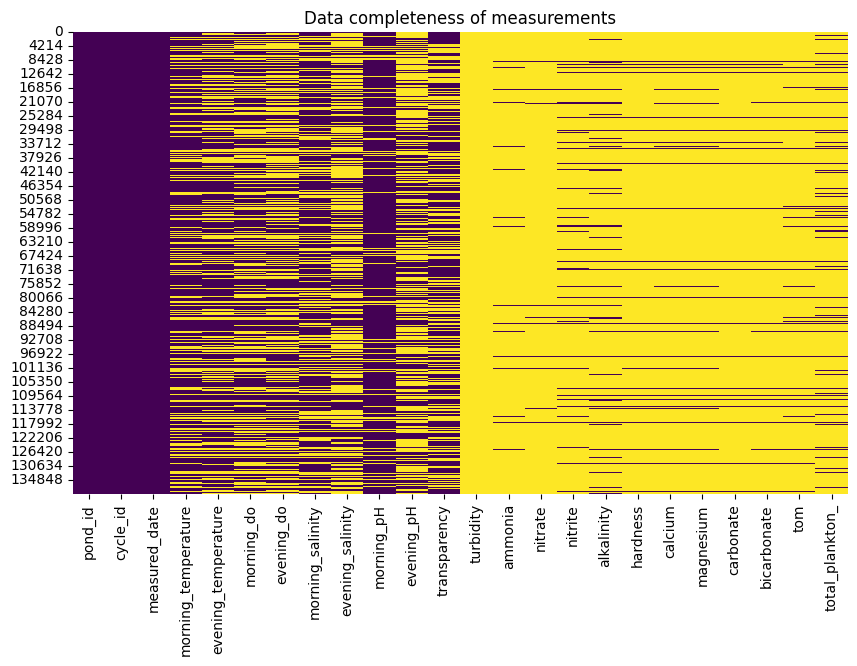

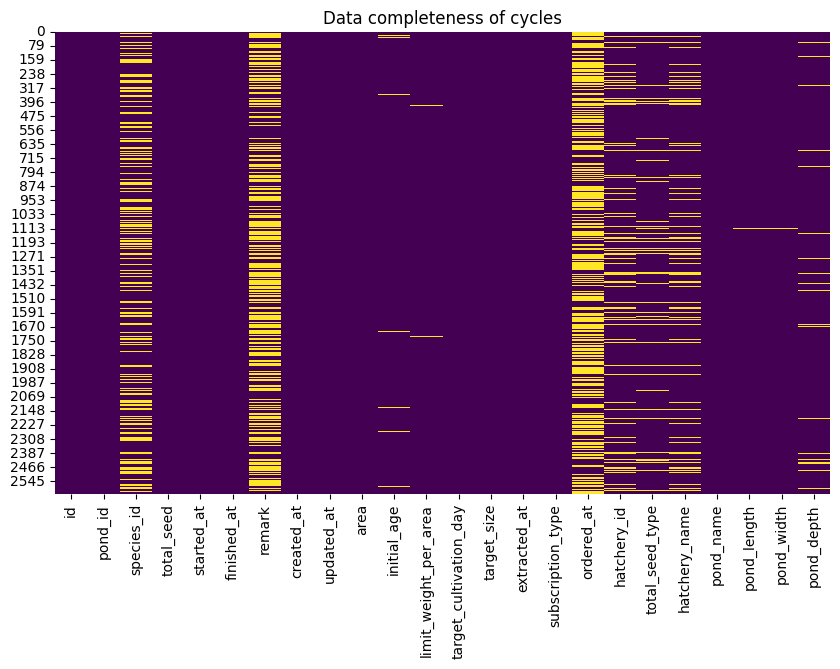

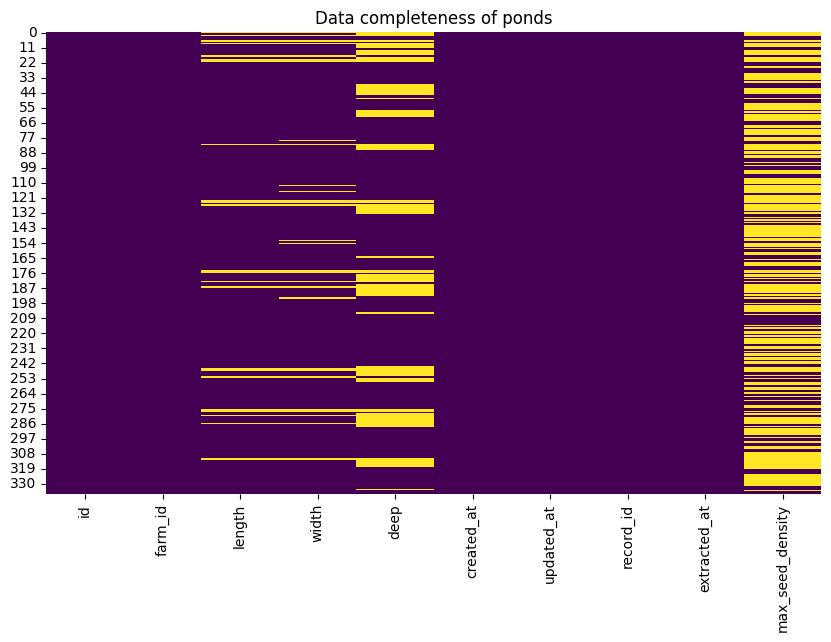

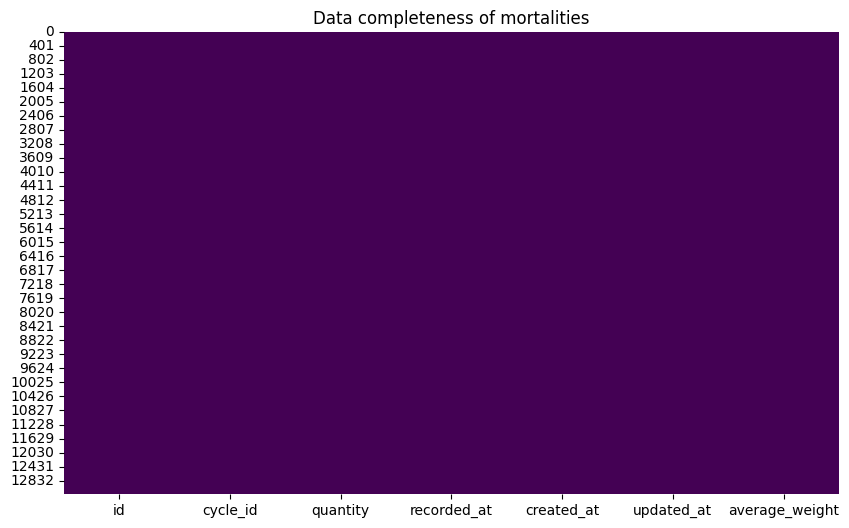

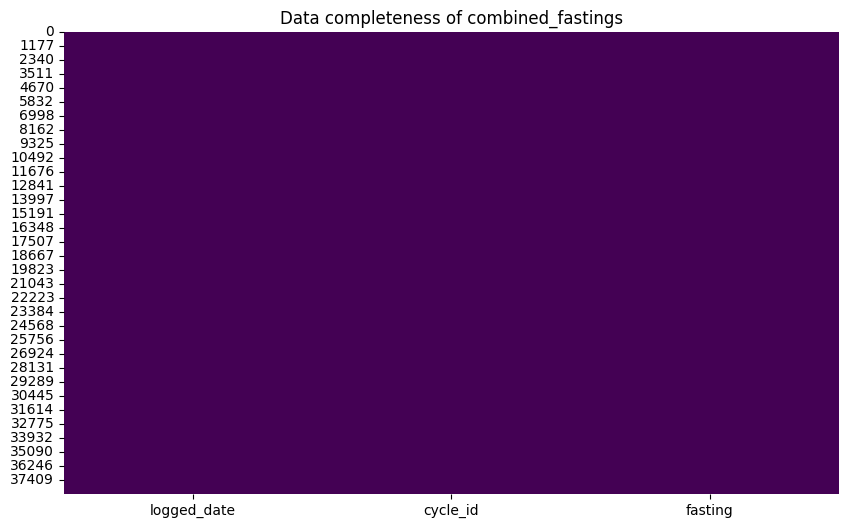

In [35]:
for name, df in dataframes.items():
    plot_missin_data_heatmap(df, f"Data completeness of {name}")

### A. Farms

In [36]:
dataframes['farms'].head()

id          province     regency timezone
0   652        JAWA BARAT      SUBANG   +07:00
1   869  SULAWESI SELATAN       BARRU   +08:00
2   900        JAWA TIMUR     PACITAN   +07:00
3  1000        JAWA TIMUR   SITUBONDO   +07:00
4  1106        JAWA TIMUR  BANYUWANGI   +07:00

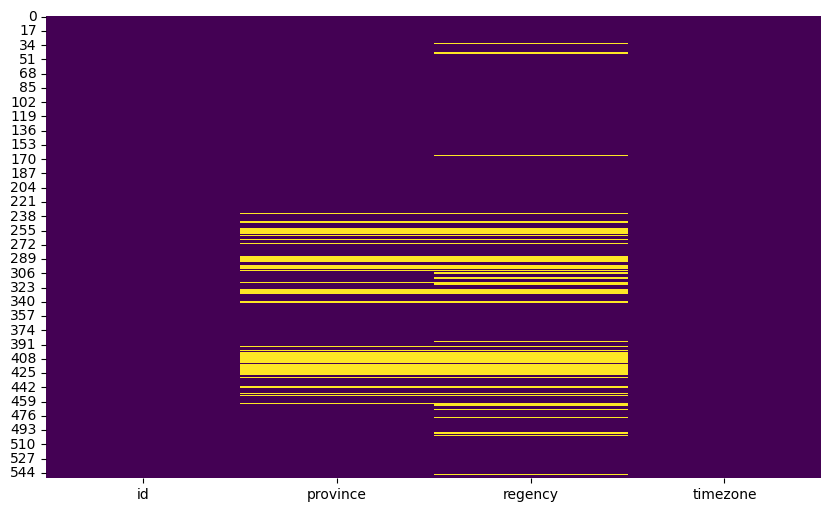

In [37]:
plot_missin_data_heatmap(dataframes['farms'], "")

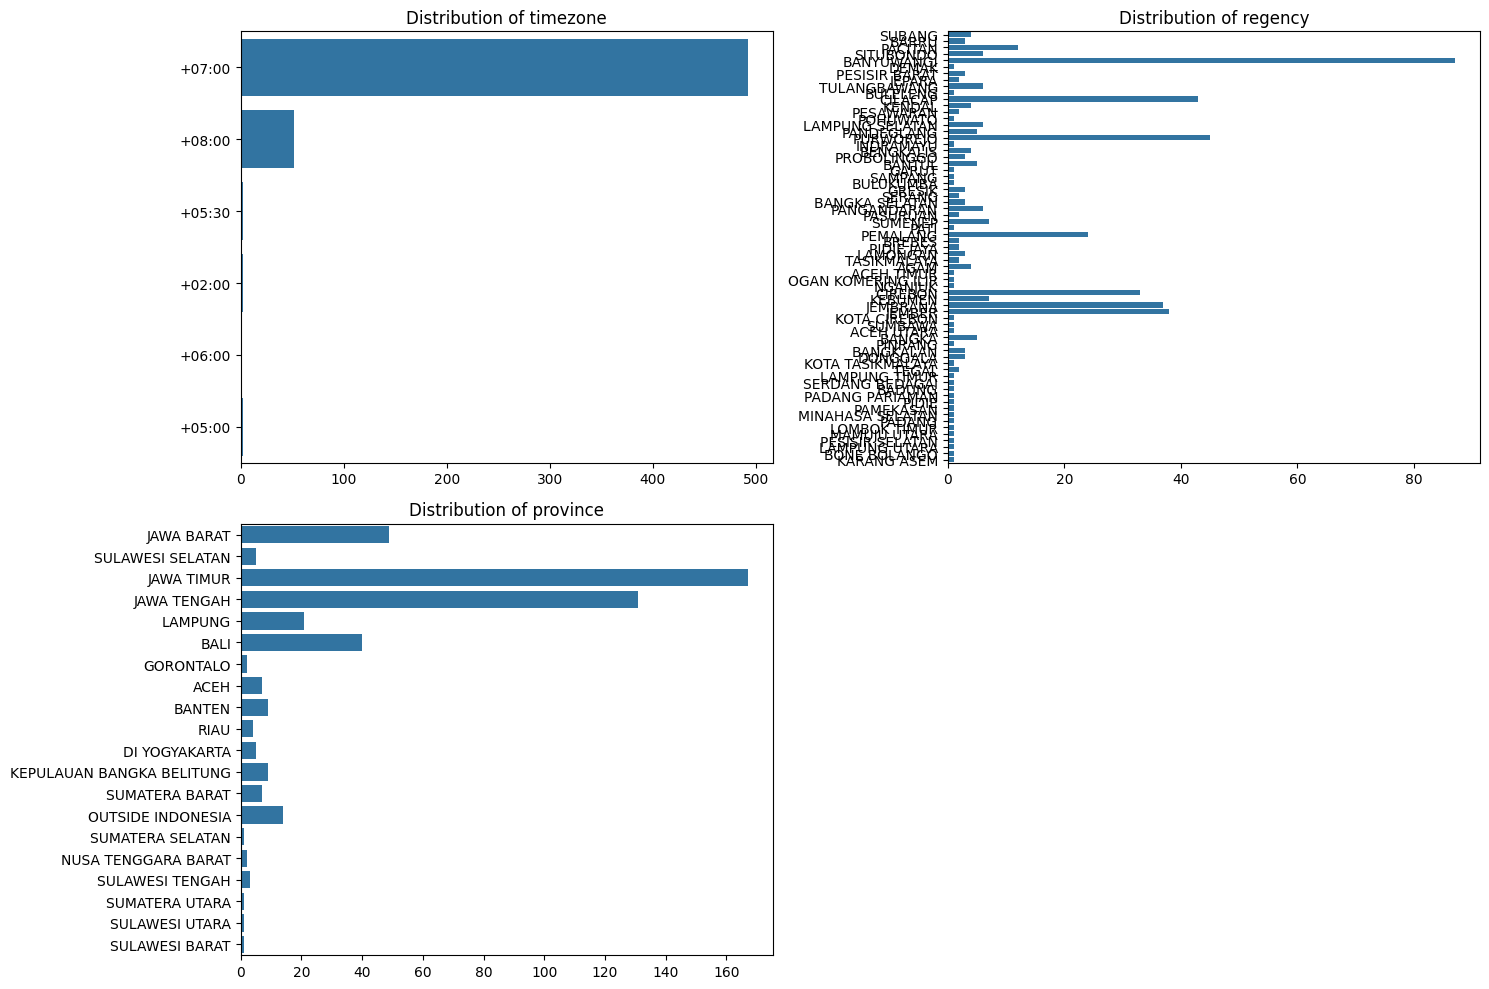

In [38]:
plot_distribution(dataframe=dataframes['farms'][['timezone', 'regency', 'province']])

### B. Ponds

In [39]:
dataframes['ponds'].describe()

id       farm_id      length       width        deep  \
count    338.000000    338.000000  315.000000  309.000000  246.000000   
mean   36899.159763  10151.973373   46.604698   29.845825    7.133537   
min        1.000000      2.000000    0.600000    0.450000    0.900000   
25%    28825.250000   7365.000000   30.000000   20.000000    1.000000   
50%    44596.500000  12546.500000   36.510000   30.000000    1.300000   
75%    44702.750000  12562.000000   50.000000   40.000000    1.600000   
max    47762.000000  13378.000000  253.660000  190.240000  150.000000   
std    12968.985879   4008.835331   37.879973   18.142403   26.681219   

                          created_at                     updated_at  \
count                            338                            338   
mean   2022-11-04 01:41:20.437869824  2022-11-28 15:35:32.011834368   
min              2018-03-07 19:05:09            2018-03-15 00:46:10   
25%              2021-11-28 17:03:39  2021-11-29 06:03:56.750000128   
50%       2023-10-13 06:03:30.500000     2023-10-13 07:50:23.500000   
75%              2023-10-16 06:46:15  2023-10-16 07:11:45.750000128   
max              2024-02-29 05:51:20            2024-03-09 14:22:53   
std                              NaN                            NaN   

                        extracted_at  max_seed_density  
count                            338        135.000000  
mean   2024-03-20 15:32:43.147929344        248.672850  
min              2021-09-19 17:02:16          0.000625  
25%              2024-04-12 17:02:11         63.783784  
50%              2024-04-12 17:02:11        120.000000  
75%              2024-04-12 17:02:11        185.205992  
max              2024-04-12 17:02:11      12500.000000  
std                              NaN       1077.046893

In [40]:
dataframes['ponds'].head()

id  farm_id  length  width  deep          created_at          updated_at  \
0  2117        8     NaN    NaN   NaN 2018-04-19 20:09:43 2018-04-19 20:09:43   
1     9        3    16.7   36.2   NaN 2018-03-07 19:05:09 2018-03-15 00:58:08   
2  2116        8     NaN    NaN   NaN 2018-04-19 20:09:43 2018-04-19 20:09:43   
3     7        3    46.5   32.6   1.1 2018-03-07 19:05:09 2018-03-15 00:51:55   
4     8        3    48.5   33.0   1.1 2018-03-07 19:05:09 2022-05-28 13:31:07   

               record_id        extracted_at  max_seed_density  
0  ponds_2023_12_21_2117 2023-12-21 17:02:10               NaN  
1      ponds_2024_4_12_9 2024-04-12 17:02:11               NaN  
2  ponds_2023_12_21_2116 2023-12-21 17:02:10               NaN  
3      ponds_2024_4_12_7 2024-04-12 17:02:11        131.926121  
4      ponds_2024_4_12_8 2024-04-12 17:02:11        124.921924

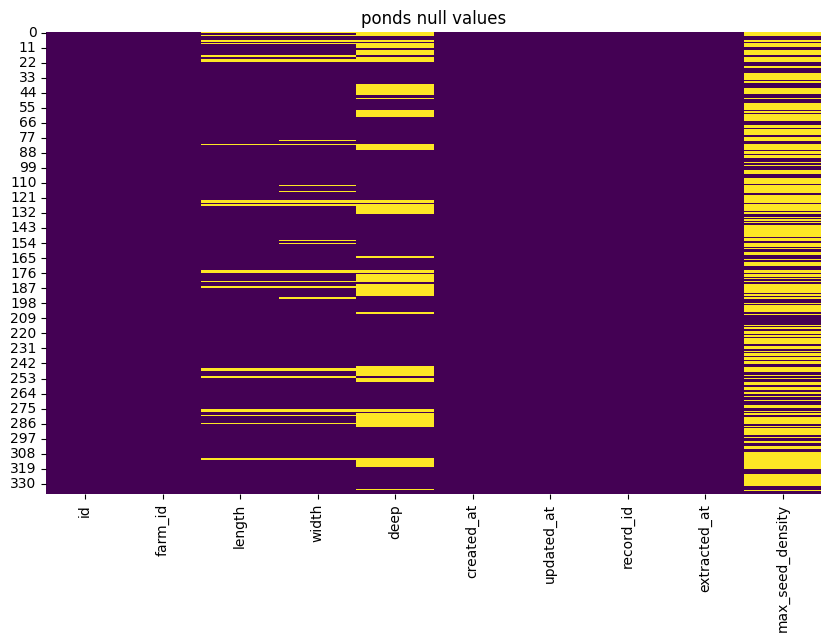

In [41]:
plot_missin_data_heatmap(dataframes['ponds'], "ponds null values")

In [42]:
# drop field `created_at, updated_at, record_id, extracted_at`
dataframes['ponds'].drop(['created_at', 'updated_at', 'record_id', 'extracted_at'], axis=1, inplace=True)

In [43]:
dataframes['ponds'].columns

Index(['id', 'farm_id', 'length', 'width', 'deep', 'max_seed_density'], dtype='object')

### C. Cycles

In [44]:
dataframes['cycles'].info()

<class 'pandas.core.frame.DataFrame'>
Index: 2567 entries, 0 to 2616
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   id                      2567 non-null   int64         
 1   pond_id                 2567 non-null   int64         
 2   species_id              1769 non-null   category      
 3   total_seed              2567 non-null   int64         
 4   started_at              2567 non-null   datetime64[ns]
 5   finished_at             2566 non-null   datetime64[ns]
 6   remark                  1336 non-null   object        
 7   created_at              2567 non-null   datetime64[ns]
 8   updated_at              2567 non-null   datetime64[ns]
 9   area                    2567 non-null   float64       
 10  initial_age             2520 non-null   float64       
 11  limit_weight_per_area   2560 non-null   float64       
 12  target_cultivation_day  2564 non-null   float64      

In [45]:
dataframes['cycles'][["area"]].describe()

area
count    2567.000000
mean     2264.003015
std     12215.955774
min         1.020000
25%       803.840000
50%      1385.440000
75%      2313.520000
max    422500.000000

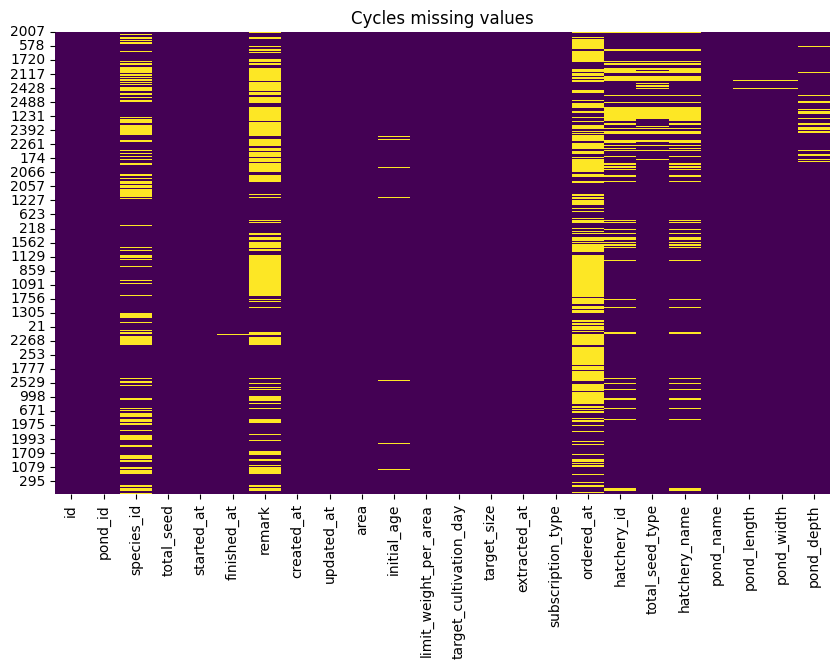

In [46]:
plot_missin_data_heatmap(dataframes['cycles'].sort_values('pond_id', ascending=True), "Cycles missing values")

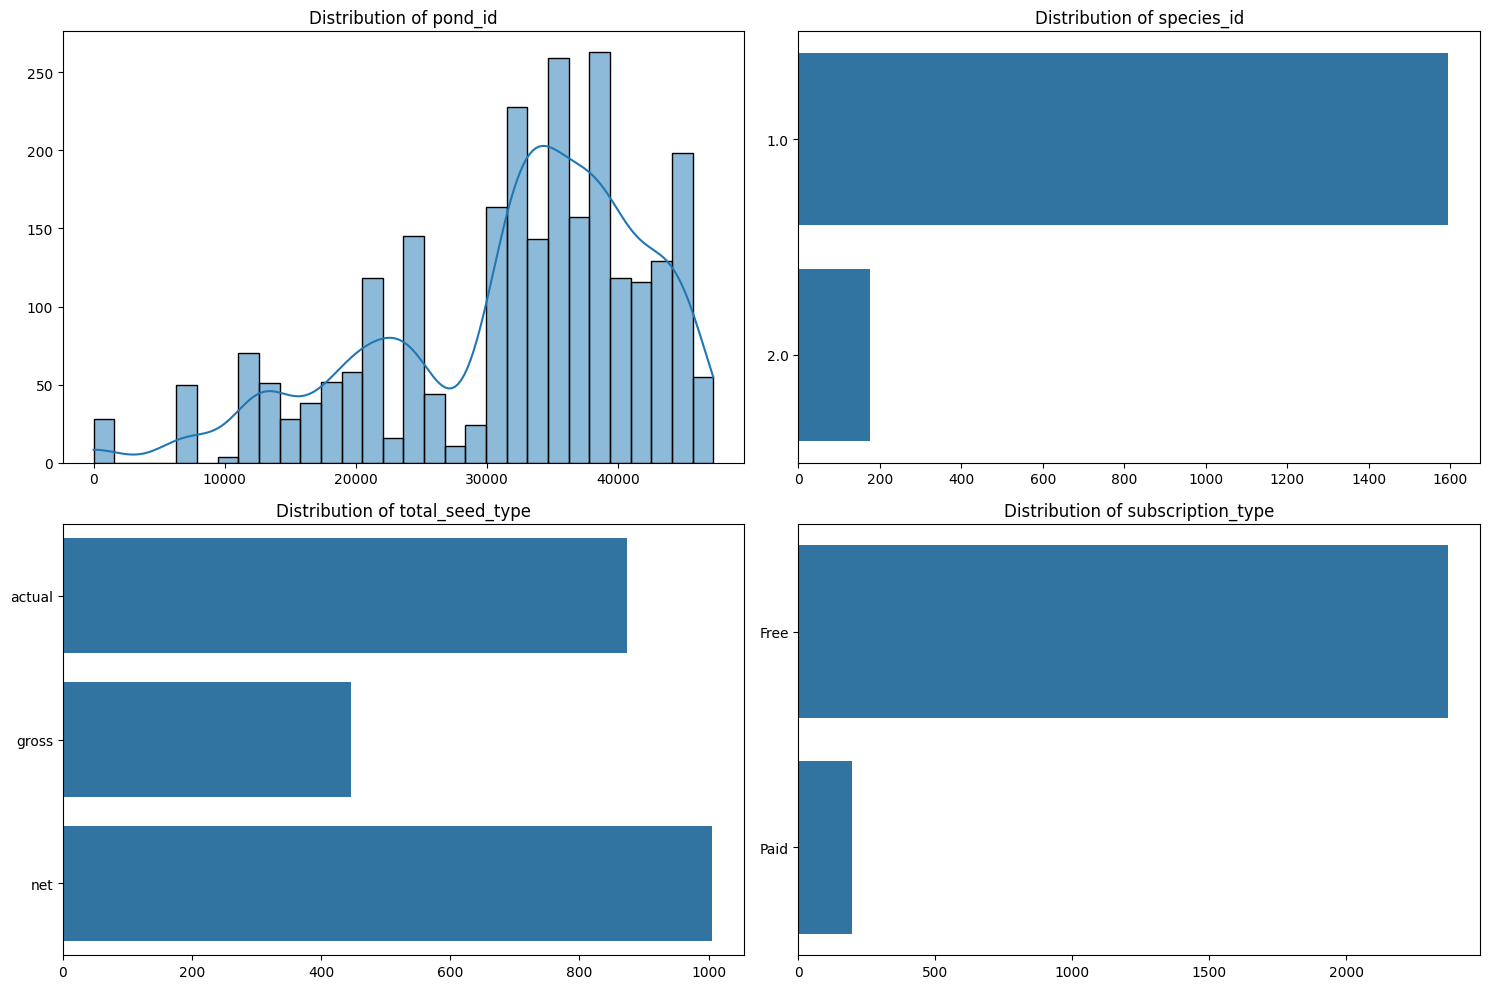

In [47]:
plot_distribution(dataframe=dataframes['cycles'][[
    "pond_id", "species_id", "total_seed_type", "subscription_type"
]])

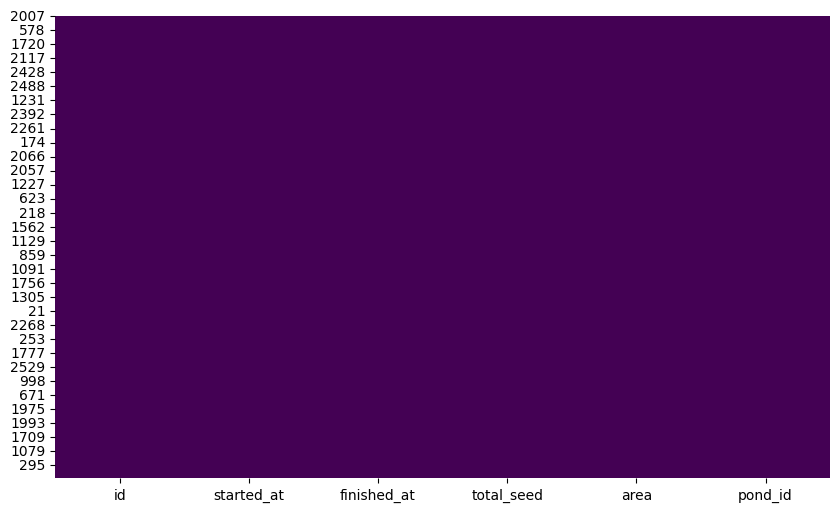

In [49]:
plot_missin_data_heatmap(dataframes['cycles'].sort_values('pond_id'), "")

In [50]:
dataframes['cycles'][dataframes['cycles'].duplicated(keep=False)]

id started_at finished_at  total_seed    area  pond_id
6     26058 2023-10-02  2024-03-03      148007  1254.0    44147
7     26058 2023-10-02  2024-03-03      148007  1254.0    44147
97    26062 2023-10-02  2024-02-18      110631   930.0    44151
98    26062 2023-10-02  2024-02-18      110631   930.0    44151
115   23823 2023-07-21  2023-12-16      275000  4999.9    34704
...     ...        ...         ...         ...     ...      ...
2558  23976 2023-06-26  2023-09-21      456142  1056.0    34490
2559  26057 2023-10-02  2024-02-29      149502  1258.0    44146
2560  26057 2023-10-02  2024-02-29      149502  1258.0    44146
2577  23329 2023-07-17  2024-01-02      275000  4999.9    34712
2578  23329 2023-07-17  2024-01-02      275000  4999.9    34712

[128 rows x 6 columns]

In [51]:
dataframes['farms']

id           province      regency timezone
0      652         JAWA BARAT       SUBANG   +07:00
1      869   SULAWESI SELATAN        BARRU   +08:00
2      900         JAWA TIMUR      PACITAN   +07:00
3     1000         JAWA TIMUR    SITUBONDO   +07:00
4     1106         JAWA TIMUR   BANYUWANGI   +07:00
..     ...                ...          ...      ...
546  13692  OUTSIDE INDONESIA          NaN   +07:00
547  13743               BALI  KARANG ASEM   +08:00
548  13788         JAWA TIMUR       JEMBER   +07:00
549  13876         JAWA TIMUR   BANYUWANGI   +07:00
550  13886         JAWA TIMUR       JEMBER   +07:00

[551 rows x 4 columns]

In [52]:
df_cycle_ponds = pd.merge(
    dataframes['cycles'], 
        pd.merge(
            dataframes['ponds'], dataframes['farms'],
            left_on='farm_id', right_on='id',
            how='inner', suffixes=('', '_farms')
        ),
    left_on='pond_id', right_on='id',
    how='inner', suffixes=('', '_ponds')
)

In [53]:
df_cycle_ponds.sort_values('started_at')

id started_at finished_at  total_seed    area  pond_id  id_ponds  \
0   29100 2022-10-01  2023-01-11      333500  2002.5    44540     44540   
17  29103 2022-10-01  2023-01-13      290000  2000.5    44543     44543   
14  29104 2022-10-01  2023-01-12      342900  2003.5    44544     44544   
13  29110 2022-10-01  2023-01-09      277500  1401.2    44550     44550   
12  29105 2022-10-01  2023-01-09      211000  1405.2    44545     44545   
9   29107 2022-10-01  2023-01-12      250000  1202.4    44547     44547   
22  29102 2022-10-01  2023-01-15      287500  2000.5    44542     44542   
5   29109 2022-10-01  2023-01-10      277500  1304.0    44549     44549   
4   29101 2022-10-01  2023-01-12      333500  2000.5    44541     44541   
1   29099 2022-10-01  2023-01-10      333500  2002.5    44539     44539   
6   29108 2022-10-01  2023-01-11      250000  1202.4    44548     44548   
11  26913 2023-10-14  2023-11-14      200000  1156.0    45040     45040   
18  26914 2023-10-23  2023-12-20      500000  1156.0    45041     45041   
7   27150 2023-11-01  2024-01-10       80000   621.0    44585     44585   
8   27153 2023-11-01  2024-01-10      112500   783.0    44587     44587   
10  27151 2023-11-01  2024-01-04      120000   850.0    44588     44588   
21  27152 2023-11-01  2024-01-10      112500   783.0    44586     44586   
3   27146 2023-11-01  2024-01-11      160000   960.0    44566     44566   
16  27147 2023-11-01  2024-01-11      140000   870.0    44515     44515   
19  27149 2023-11-01  2024-01-11       70000   504.0    44517     44517   
20  27148 2023-11-01  2024-01-11      105000   812.0    44516     44516   
15  28922 2024-01-18  2024-02-14      362738  2003.5    44544     44544   
2   28943 2024-01-19  2024-03-19      287147  1202.4    44548     44548   

    farm_id  length  width  deep  max_seed_density  id_farms  \
0     12537    50.0  40.05   1.3        213.632959     12537   
17    12537    50.0  40.01   1.3        192.110972     12537   
14    12537    50.0  40.07   1.3        192.295483     12537   
13    12537    40.0  35.03   1.3        257.243791     12537   
12    12537    40.0  35.13   1.3        274.170225     12537   
9     12537    40.0  30.06   1.3        320.412508     12537   
22    12537    50.0  40.01   1.3        192.110972     12537   
5     12537    40.0  32.60   1.3        276.418712     12537   
4     12537    50.0  40.01   1.3        192.110972     12537   
1     12537    50.0  40.05   1.3        190.411985     12537   
6     12537    40.0  30.06   1.3        266.467066     12537   
11    13251    34.0  34.00   1.6        173.010381     13251   
18    13251    34.0  34.00   1.6        432.525952     13251   
7     12545    27.0  23.00   1.3        128.824477     12545   
8     12545    29.0  27.00   1.3        143.678161     12545   
10    12545    30.0  28.00   1.3        141.176471     12545   
21    12545    29.0  27.00   1.3        143.678161     12545   
3     12530    32.0  30.00   1.3        166.666667     12530   
16    12530    30.0  29.00   1.3        160.919540     12530   
19    12530    24.0  21.00   1.3        138.888889     12530   
20    12530    29.0  28.00   1.3        129.310345     12530   
15    12537    50.0  40.07   1.3        192.295483     12537   
2     12537    40.0  30.06   1.3        266.467066     12537   

             province       regency timezone  
0      SULAWESI BARAT  MAMUJU UTARA   +08:00  
17     SULAWESI BARAT  MAMUJU UTARA   +08:00  
14     SULAWESI BARAT  MAMUJU UTARA   +08:00  
13     SULAWESI BARAT  MAMUJU UTARA   +08:00  
12     SULAWESI BARAT  MAMUJU UTARA   +08:00  
9      SULAWESI BARAT  MAMUJU UTARA   +08:00  
22     SULAWESI BARAT  MAMUJU UTARA   +08:00  
5      SULAWESI BARAT  MAMUJU UTARA   +08:00  
4      SULAWESI BARAT  MAMUJU UTARA   +08:00  
1      SULAWESI BARAT  MAMUJU UTARA   +08:00  
6      SULAWESI BARAT  MAMUJU UTARA   +08:00  
11  OUTSIDE INDONESIA           NaN   +07:00  
18  OUTSIDE INDONESIA           NaN   +07:00  
7          

In [54]:
df_cycle_ponds.insert(
    loc=df_cycle_ponds.columns.get_loc('finished_at') + 1,
    column='cycle_time',
    value=(df_cycle_ponds['finished_at'] - df_cycle_ponds['started_at'])
)

In [251]:
df_cycle_ponds.insert(
    loc=df_cycles.columns.get_loc('area')+1,
    column='seed_density',
    value=(round(df_cycles.total_seed / df_cycles.area, 2))
)

In [255]:
df_cycle_ponds.sort_values('id_farms')

id started_at finished_at cycle_time  total_seed    area  seed_density  \
3   27146 2023-11-01  2024-01-11    71 days      160000   960.0        111.29   
20  27148 2023-11-01  2024-01-11    71 days      105000   812.0         64.25   
19  27149 2023-11-01  2024-01-11    71 days       70000   504.0        396.04   
16  27147 2023-11-01  2024-01-11    71 days      140000   870.0        136.89   
4   29101 2022-10-01  2023-01-12   103 days      333500  2000.5        153.47   
0   29100 2022-10-01  2023-01-11   102 days      333500  2002.5         82.36   
1   29099 2022-10-01  2023-01-10   101 days      333500  2002.5        100.25   
2   28943 2024-01-19  2024-03-19    60 days      287147  1202.4        178.78   
15  28922 2024-01-18  2024-02-14    27 days      362738  2003.5        424.33   
14  29104 2022-10-01  2023-01-12   103 days      342900  2003.5         22.86   
13  29110 2022-10-01  2023-01-09   100 days      277500  1401.2        144.24   
12  29105 2022-10-01  2023-01-09   100 days      211000  1405.2         90.00   
17  29103 2022-10-01  2023-01-13   104 days      290000  2000.5         95.24   
5   29109 2022-10-01  2023-01-10   101 days      277500  1304.0        248.96   
6   29108 2022-10-01  2023-01-11   102 days      250000  1202.4        118.03   
9   29107 2022-10-01  2023-01-12   103 days      250000  1202.4      14315.83   
22  29102 2022-10-01  2023-01-15   106 days      287500  2000.5        121.20   
10  27151 2023-11-01  2024-01-04    64 days      120000   850.0      11717.74   
8   27153 2023-11-01  2024-01-10    70 days      112500   783.0      12561.00   
7   27150 2023-11-01  2024-01-10    70 days       80000   621.0        118.03   
21  27152 2023-11-01  2024-01-10    70 days      112500   783.0        145.36   
11  26913 2023-10-14  2023-11-14    31 days      200000  1156.0         96.55   
18  26914 2023-10-23  2023-12-20    58 days      500000  1156.0        636.49   

    pond_id  id_ponds  farm_id  length  width  deep  max_seed_density  \
3     44566     44566    12530    32.0  30.00   1.3        166.666667   
20    44516     44516    12530    29.0  28.00   1.3        129.310345   
19    44517     44517    12530    24.0  21.00   1.3        138.888889   
16    44515     44515    12530    30.0  29.00   1.3        160.919540   
4     44541     44541    12537    50.0  40.01   1.3        192.110972   
0     44540     44540    12537    50.0  40.05   1.3        213.632959   
1     44539     44539    12537    50.0  40.05   1.3        190.411985   
2     44548     44548    12537    40.0  30.06   1.3        266.467066   
15    44544     44544    12537    50.0  40.07   1.3        192.295483   
14    44544     44544    12537    50.0  40.07   1.3        192.295483   
13    44550     44550    12537    40.0  35.03   1.3        257.243791   
12    44545     44545    12537    40.0  35.13   1.3        274.170225   
17    44543     44543    12537    50.0  40.01   1.3        192.110972   
5     44549     44549    12537    40.0  32.60   1.3        276.418712   
6     44548     44548    12537    40.0  30.06   1.3        266.467066   
9     44547     44547    12537    40.0  30.06   1.3        320.412508   
22    44542     44542    12537    50.0  40.01   1.3        192.110972   
10    44588     44588    12545    30.0  28.00   1.3        141.176471   
8     44587     44587    12545    29.0  27.00   1.3        143.678161   
7     44585     44585    12545    27.0  23.00   1.3        128.824477   
21    44586     44586    12545    29.0  27.00   1.3        143.678161   
11    45040     45040    13251    34.0  34.00   1.6        173.010381   
18    45041     45041    13251    34.0  34.00   1.6        432.525952   

    id_farms           province       regency timezone  
3      12530         JAWA TIMUR       PACITAN   +07:00  
20     12530         JAWA TIMUR       PACITAN   +07:00  
19     12530         JAWA TIMUR       PACITAN   +07:00  
16     12530         JAWA TIMUR       PACITAN   +07:00  
4      12537     SULAWES

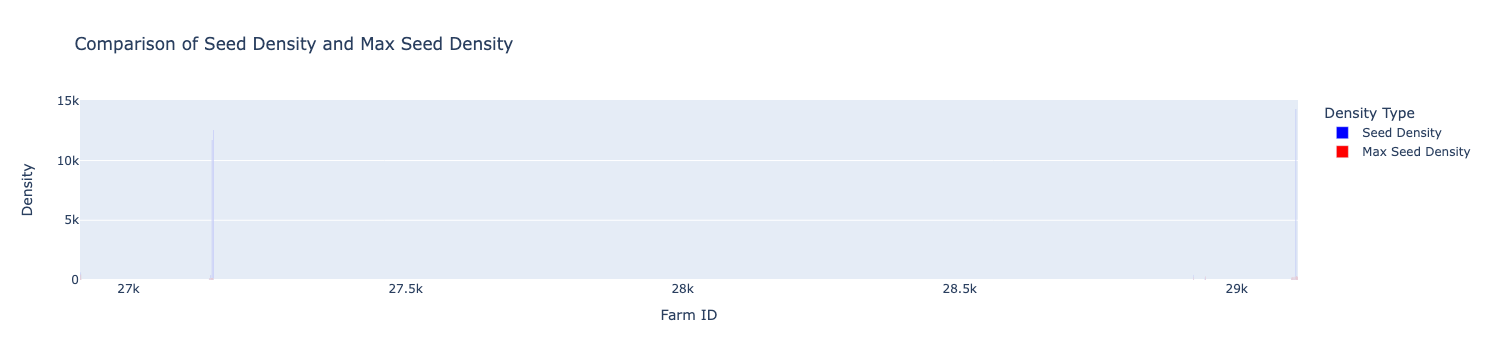

In [261]:
df = df_cycle_ponds.copy()
# Buat figure
# Membuat bar chart berkelompok
fig = go.Figure(data=[
    go.Bar(name='Seed Density', x=df['id'], y=df['seed_density'], marker_color='blue'),
    go.Bar(name='Max Seed Density', x=df['id'], y=df['max_seed_density'], marker_color='red')
])

# Mengubah tata letak
fig.update_layout(
    barmode='group',  # Mengatur bar agar ditampilkan secara berkelompok
    title="Comparison of Seed Density and Max Seed Density",
    xaxis_title="Farm ID",
    yaxis_title="Density",
    legend_title="Density Type"
)

# Menampilkan plot
fig.show()

In [259]:
df_cycles

id started_at finished_at cycle_time  total_seed    area  \
0     18876 2022-10-14  2023-01-29   107 days      331920  4030.0   
1     22118 2023-04-26  2023-06-23    58 days       40000   399.0   
2     24088 2023-08-01  2023-10-18    78 days      357570  2000.0   
3     17743 2022-07-19  2022-09-29    72 days      168275  1512.0   
4     17125 2022-07-07  2022-09-20    75 days      188000  1225.0   
...     ...        ...         ...        ...         ...     ...   
2612  19131 2022-10-25  2023-01-21    88 days      300000  4999.9   
2613  27552 2023-11-05  2024-02-13   100 days      100000   900.0   
2614  27885 2023-12-02  2024-02-29    89 days       30716    86.0   
2615  15868 2022-04-28  2022-06-21    54 days      150000  1600.0   
2616  20849 2023-02-09  2023-04-07    57 days      384000  2915.0   

      seed_density  seed_ratio  pond_id  
0        82.362283   82.362283    36294  
1       100.250627  100.250627    37102  
2       178.785000  178.785000    39154  
3       111.292989  111.292989    20914  
4       153.469388  153.469388    34187  
...            ...         ...      ...  
2612     60.001200   60.001200    34712  
2613    111.111111  111.111111    45697  
2614    357.162791  357.162791    24570  
2615     93.750000   93.750000    32398  
2616    131.732419  131.732419    35913  

[2567 rows x 9 columns]

In [56]:
df_cycles = dataframes['cycles'].copy()

In [57]:
df_cycles.insert(
    loc=df_cycles.columns.get_loc('finished_at') + 1,
    column='cycle_time',
    value=(df_cycles.finished_at - df_cycles.started_at)
)

In [249]:
df_cycles.insert(
    loc=df_cycles.columns.get_loc('area')+1,
    column='seed_density',
    value=(df_cycles.total_seed / df_cycles.area)
)

In [250]:
df_cycles.sort_values('started_at')

id started_at finished_at cycle_time  total_seed    area  \
2277   3459 2020-03-07  2020-07-06   121 days      566669  4968.0   
1939   3458 2020-03-07  2020-06-27   112 days      566669  4968.0   
2086   4446 2020-04-04  2020-07-16   103 days      100000  2000.0   
165    4442 2020-04-04  2020-07-12    99 days       98544  2500.0   
1371   4036 2020-04-11  2020-05-20    39 days      172250   800.0   
...     ...        ...         ...        ...         ...     ...   
899   29557 2024-02-11  2024-03-10    28 days      150000  3276.0   
1785  29619 2024-02-12  2024-04-01    49 days       70000   216.0   
2468  29679 2024-02-15  2024-03-28    42 days       26671    78.5   
361   29579 2024-02-15  2024-03-26    40 days       50000   500.0   
295   29597 2024-02-18  2024-03-29    40 days      400000  2800.0   

      seed_density  seed_ratio  pond_id  
2277    114.063808  114.063808    12996  
1939    114.063808  114.063808    12969  
2086     50.000000   50.000000    11712  
165      39.417600   39.417600    15091  
1371    215.312500  215.312500    12685  
...            ...         ...      ...  
899      45.787546   45.787546    45495  
1785    324.074074  324.074074    12688  
2468    339.757962  339.757962    18522  
361     100.000000  100.000000    35864  
295     142.857143  142.857143    45690  

[2567 rows x 9 columns]

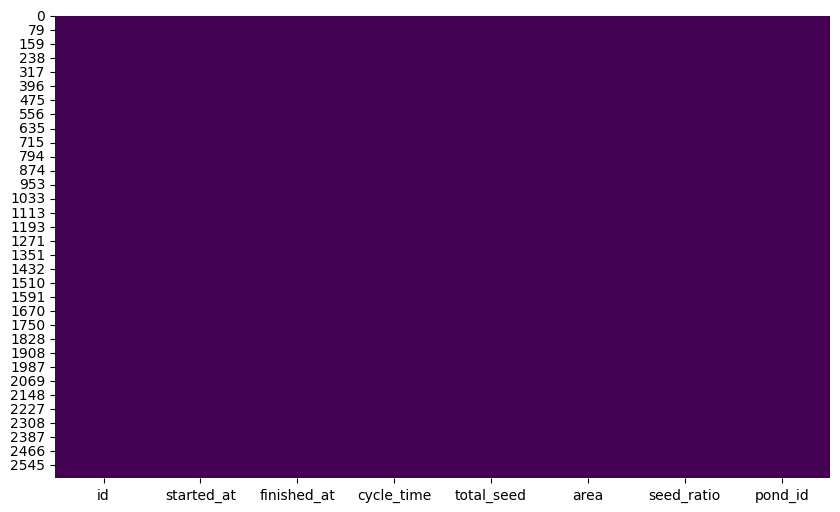

In [248]:
plot_missin_data_heatmap(df_cycles, '')

## 3. Observasi relasi antar dataset
---
- merge tabel `[feeds, fastings, mortalities, harvests, measurements, samplings]` terhadap data cycles

### Relasi antar tabel
![image](assets/table_relation.jpg)

### A. Feed on Cycles

In [102]:
df_feed_cyles = pd.merge(
    dataframes['feeds'], df_cycle_ponds, 
    left_on='cycle_id', right_on='id', 
    how='right', suffixes=('', '_cycle')
)


In [104]:
df_feed_cyles.sort_values('logged_at')

cycle_id           logged_at  quantity     id started_at finished_at  \
2265     29102 2022-09-30 17:00:00       4.0  29102 2022-10-01  2023-01-15   
1416     29110 2022-10-01 01:00:00       6.0  29110 2022-10-01  2023-01-09   
1541     29104 2022-10-01 01:00:00       4.0  29104 2022-10-01  2023-01-12   
1849     29103 2022-10-01 01:00:00       4.0  29103 2022-10-01  2023-01-13   
645      29101 2022-10-01 01:00:00       4.0  29101 2022-10-01  2023-01-12   
...        ...                 ...       ...    ...        ...         ...   
443      28943 2024-03-18 10:30:00      26.0  28943 2024-01-19  2024-03-19   
444      28943 2024-03-18 23:00:00      13.0  28943 2024-01-19  2024-03-19   
445      28943 2024-03-19 02:30:00      13.0  28943 2024-01-19  2024-03-19   
446      28943 2024-03-19 04:30:00      27.0  28943 2024-01-19  2024-03-19   
447      28943 2024-03-19 10:30:00      27.0  28943 2024-01-19  2024-03-19   

     cycle_time  total_seed    area  pond_id  id_ponds  farm_id  length  \
2265   106 days      287500  2000.5    44542     44542    12537    50.0   
1416   100 days      277500  1401.2    44550     44550    12537    40.0   
1541   103 days      342900  2003.5    44544     44544    12537    50.0   
1849   104 days      290000  2000.5    44543     44543    12537    50.0   
645    103 days      333500  2000.5    44541     44541    12537    50.0   
...         ...         ...     ...      ...       ...      ...     ...   
443     60 days      287147  1202.4    44548     44548    12537    40.0   
444     60 days      287147  1202.4    44548     44548    12537    40.0   
445     60 days      287147  1202.4    44548     44548    12537    40.0   
446     60 days      287147  1202.4    44548     44548    12537    40.0   
447     60 days      287147  1202.4    44548     44548    12537    40.0   

      width  deep  max_seed_density  id_farms        province       regency  \
2265  40.01   1.3        192.110972     12537  SULAWESI BARAT  MAMUJU UTARA   
1416  35.03   1.3        257.243791     12537  SULAWESI BARAT  MAMUJU UTARA   
1541  40.07   1.3        192.295483     12537  SULAWESI BARAT  MAMUJU UTARA   
1849  40.01   1.3        192.110972     12537  SULAWESI BARAT  MAMUJU UTARA   
645   40.01   1.3        192.110972     12537  SULAWESI BARAT  MAMUJU UTARA   
...     ...   ...               ...       ...             ...           ...   
443   30.06   1.3        266.467066     12537  SULAWESI BARAT  MAMUJU UTARA   
444   30.06   1.3        266.467066     12537  SULAWESI BARAT  MAMUJU UTARA   
445   30.06   1.3        266.467066     12537  SULAWESI BARAT  MAMUJU UTARA   
446   30.06   1.3        266.467066     12537  SULAWESI BARAT  MAMUJU UTARA   
447   30.06   1.3        266.467066     12537  SULAWESI BARAT  MAMUJU UTARA   

     timezone  
2265   +08:00  
1416   +08:00  
1541   +08:00  
1849   +08:00  
645    +08:00  
...       ...  
443    +08:00  
444    +08:00  
445    +08:00  
446    +08:00  
447    +08:00  

[2286 rows x 20 columns]

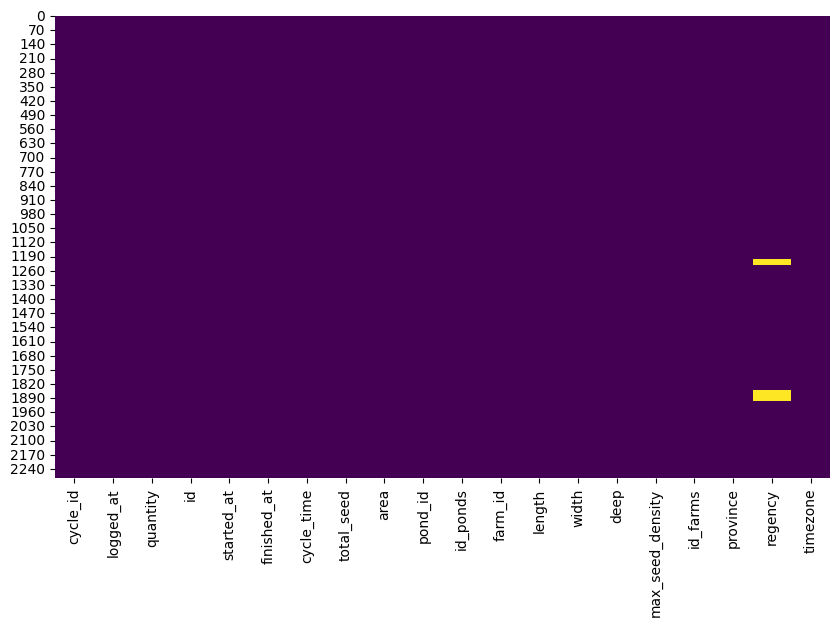

In [136]:
plot_missin_data_heatmap(df_feed_cyles, '')

In [129]:
def plot_cycle(df, cycle_id):
    cycle_data = df[df['cycle_id'] == cycle_id]
    fig = px.line(cycle_data, x='logged_at', y='quantity', title=f'Time Series for Cycle ID {cycle_id}')
    fig.show()

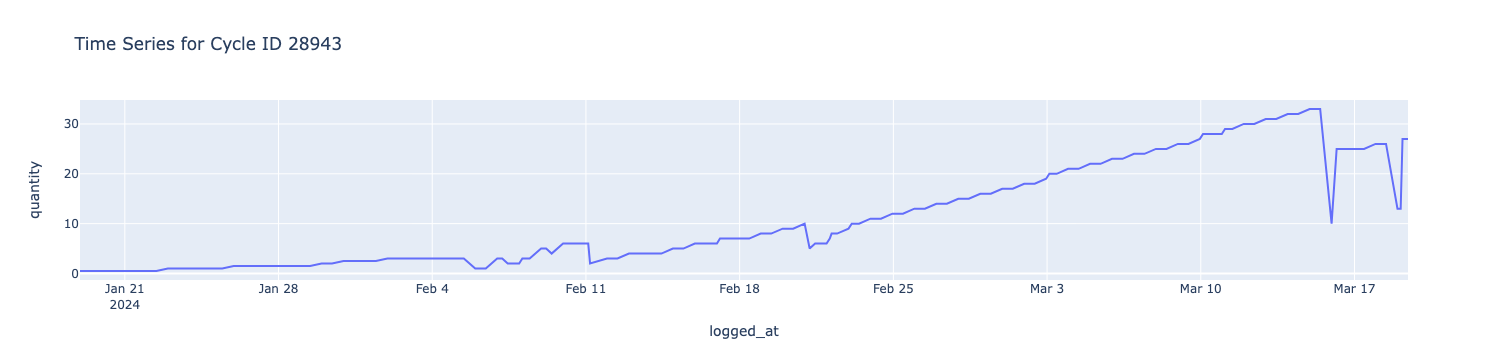

In [130]:
plot_cycle(df_feed_cyles.sort_values('logged_at'), 28943)

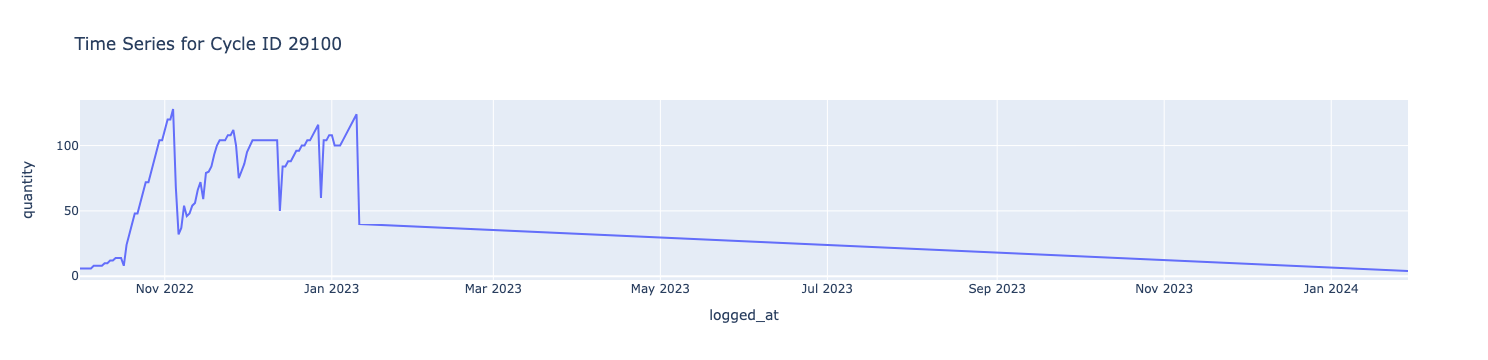

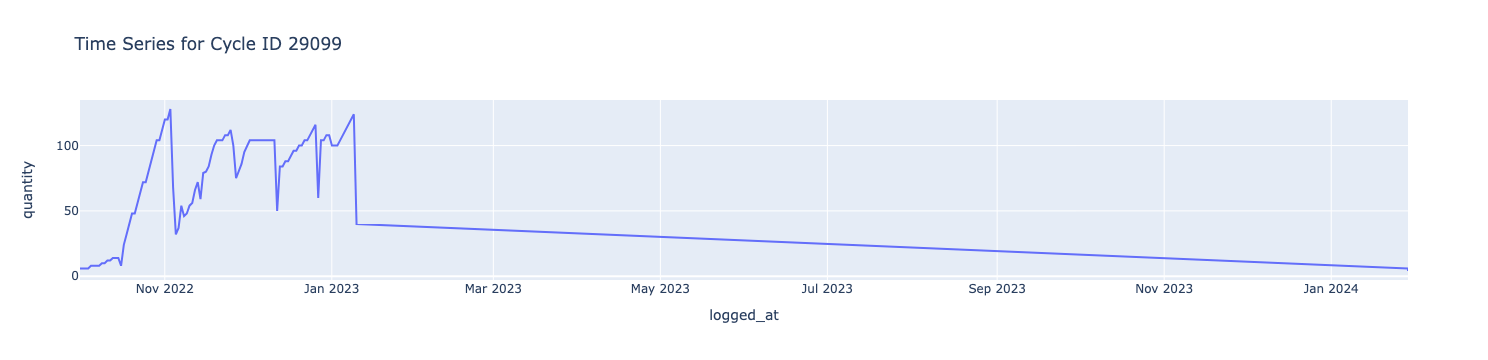

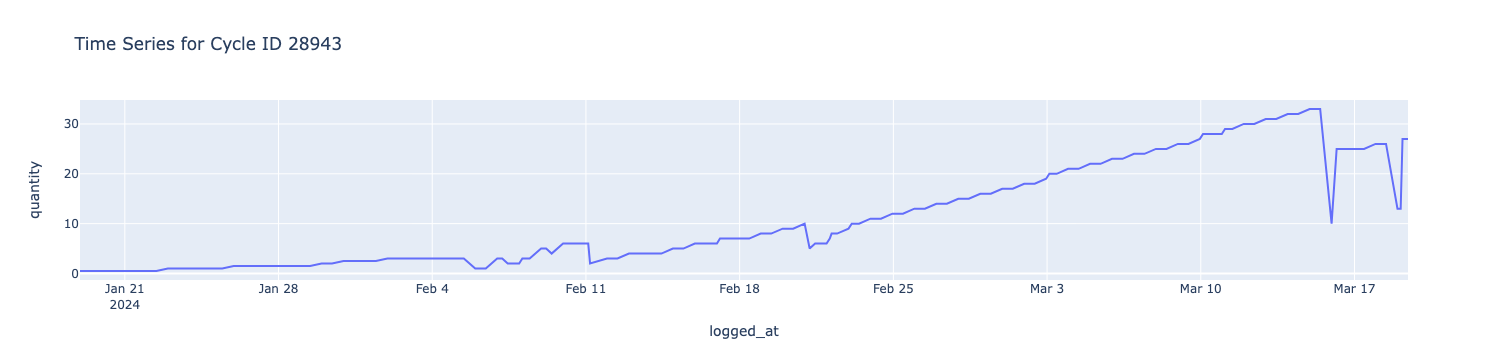

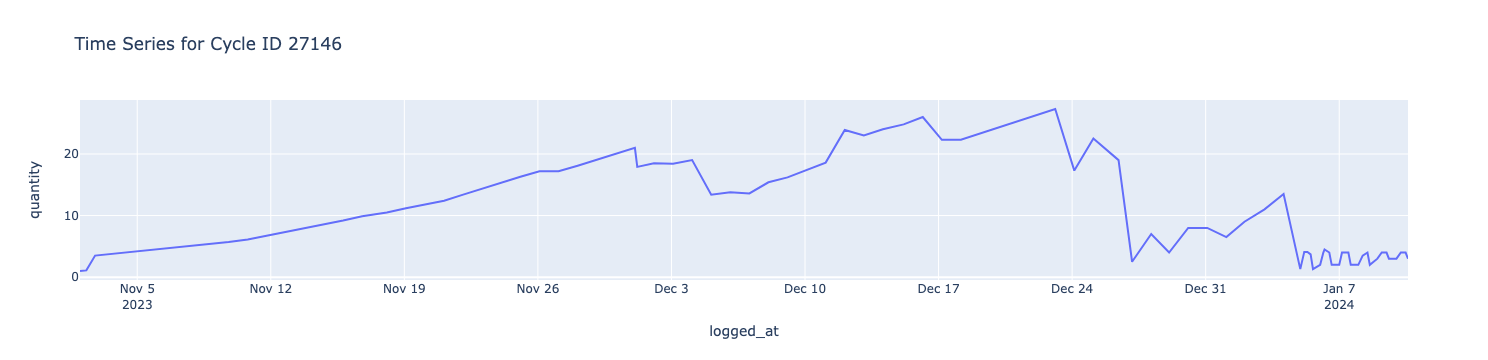

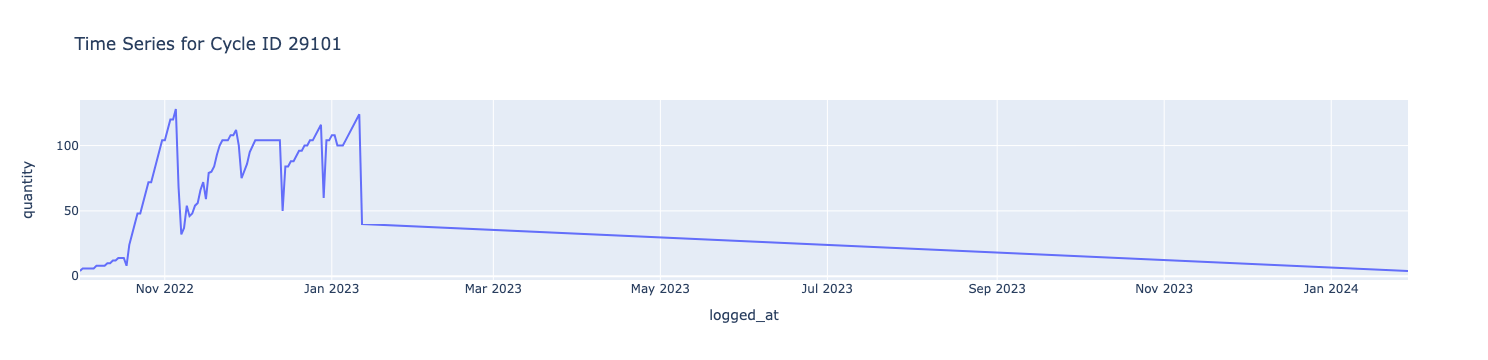

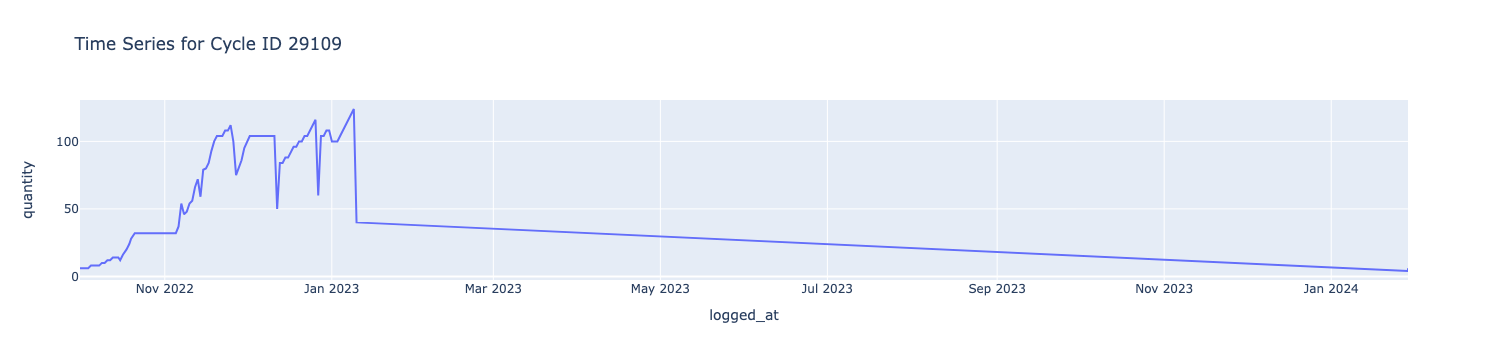

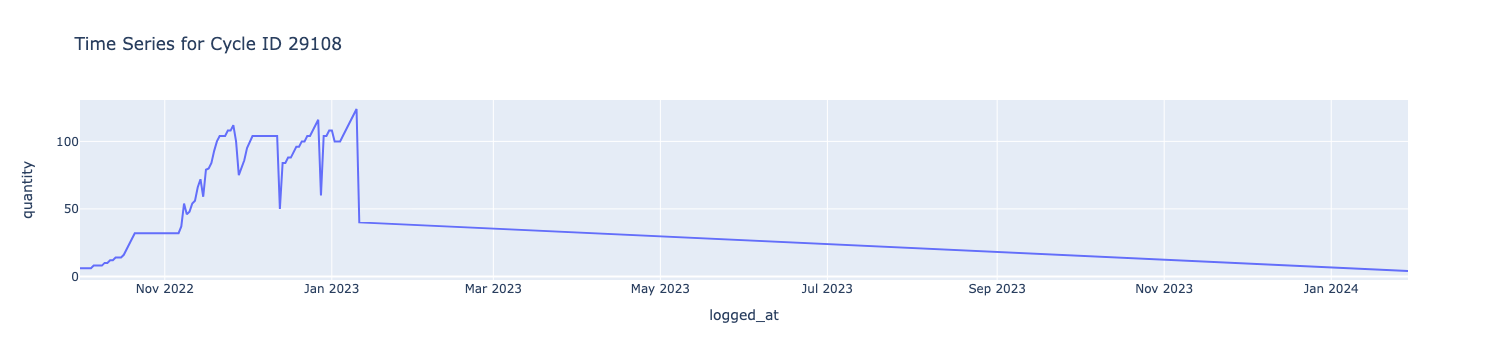

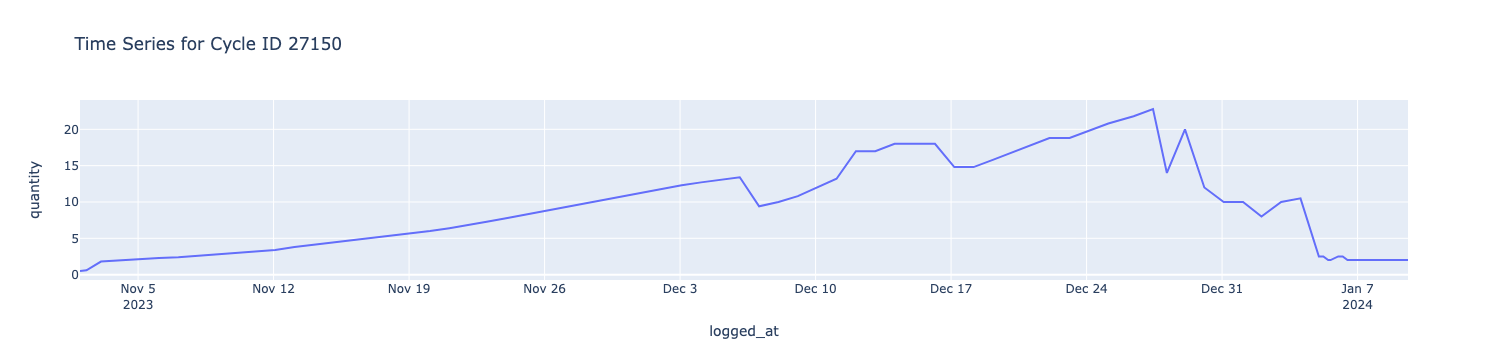

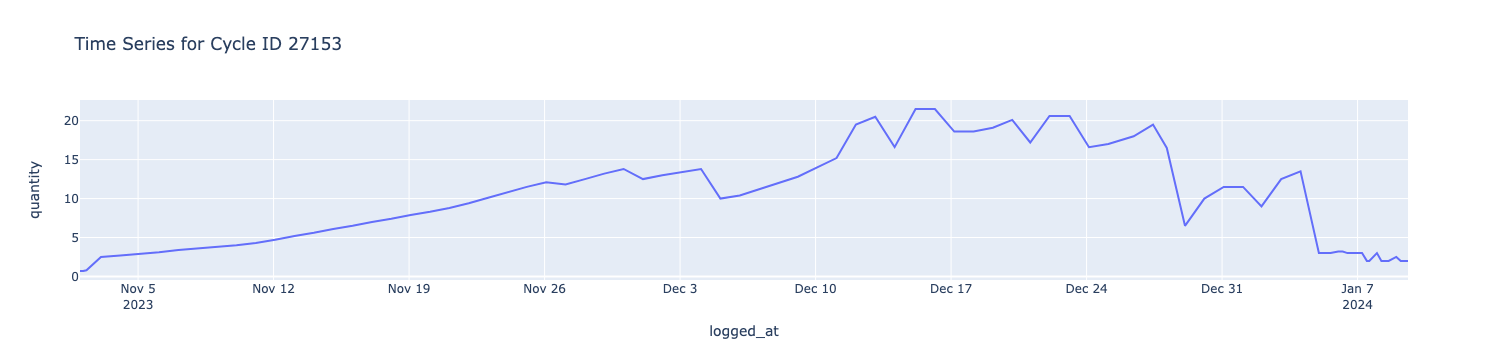

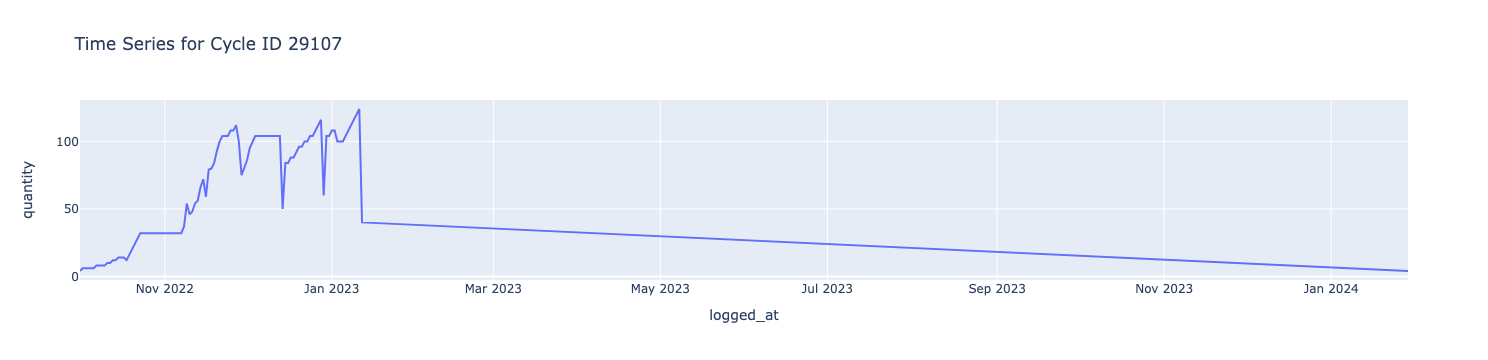

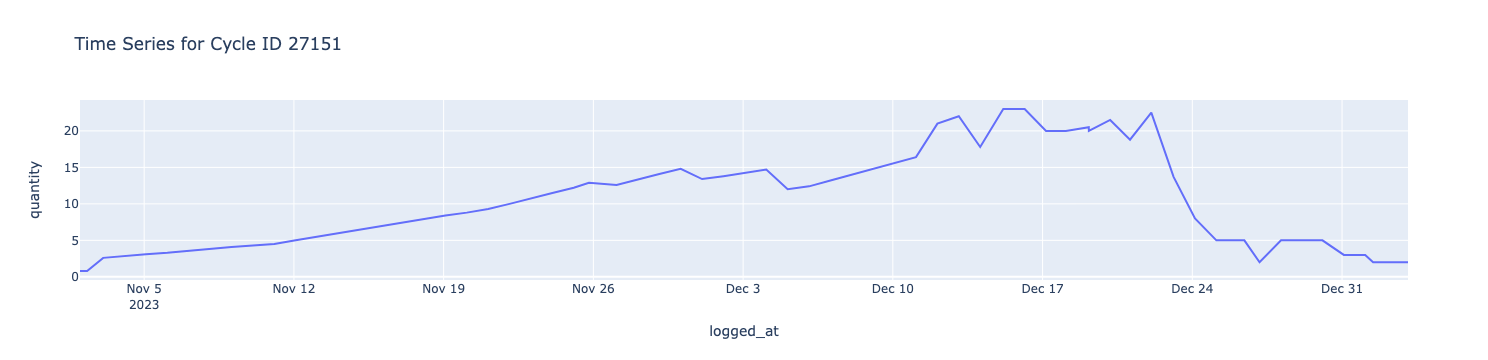

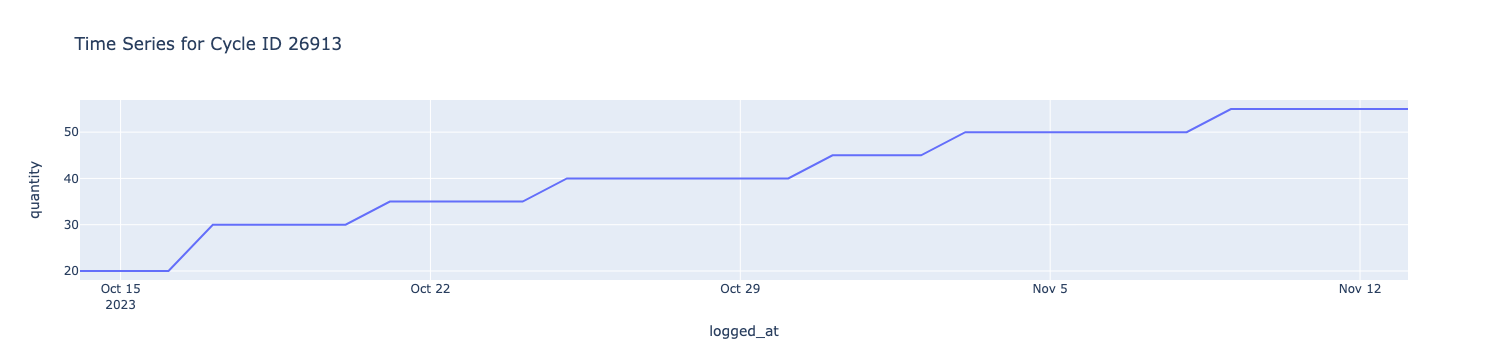

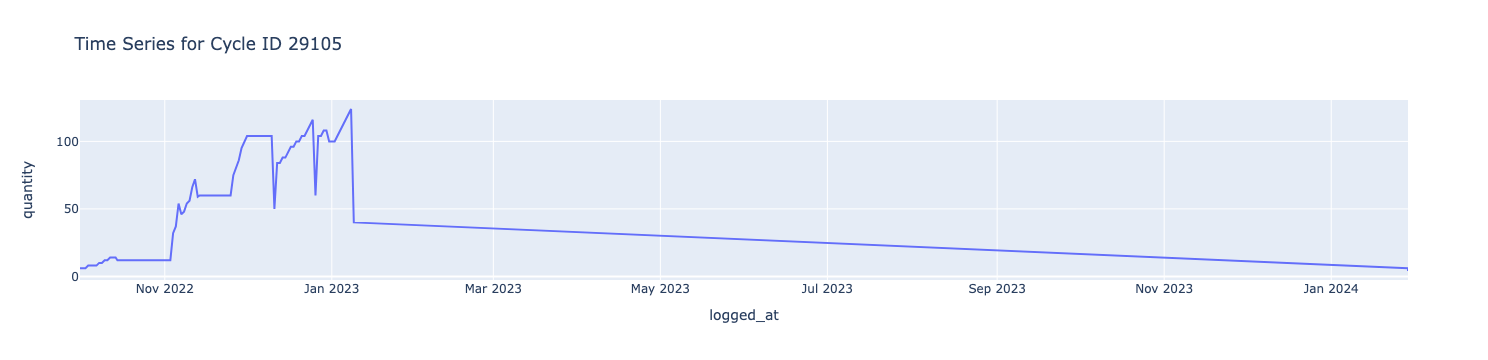

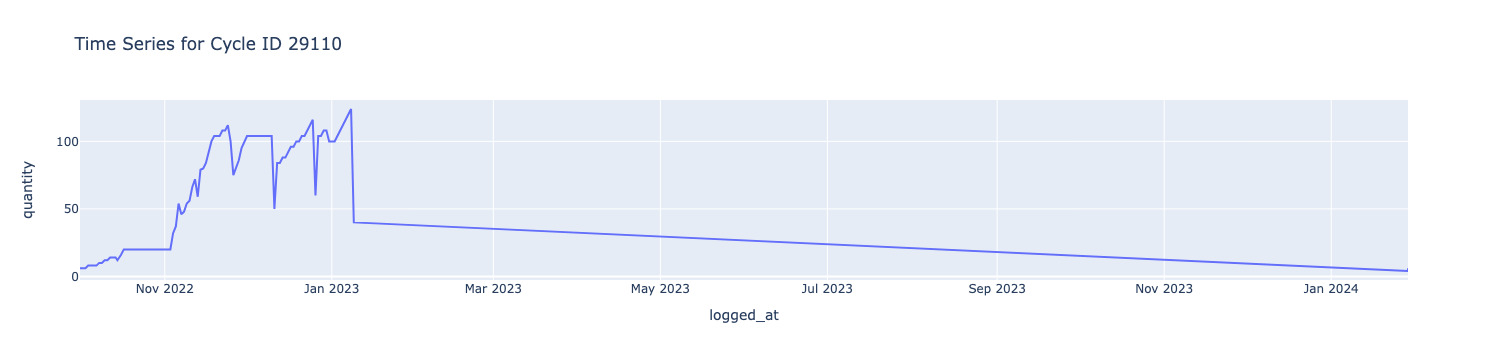

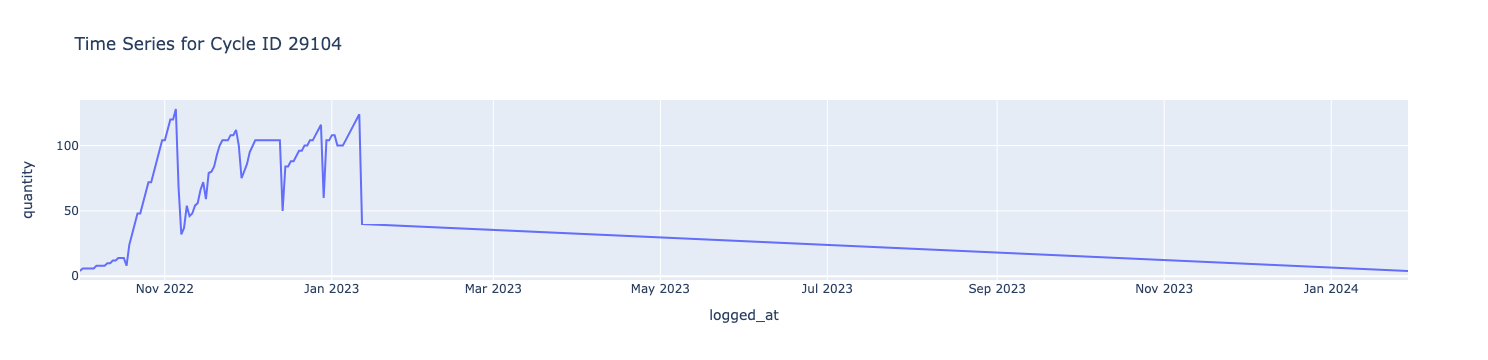

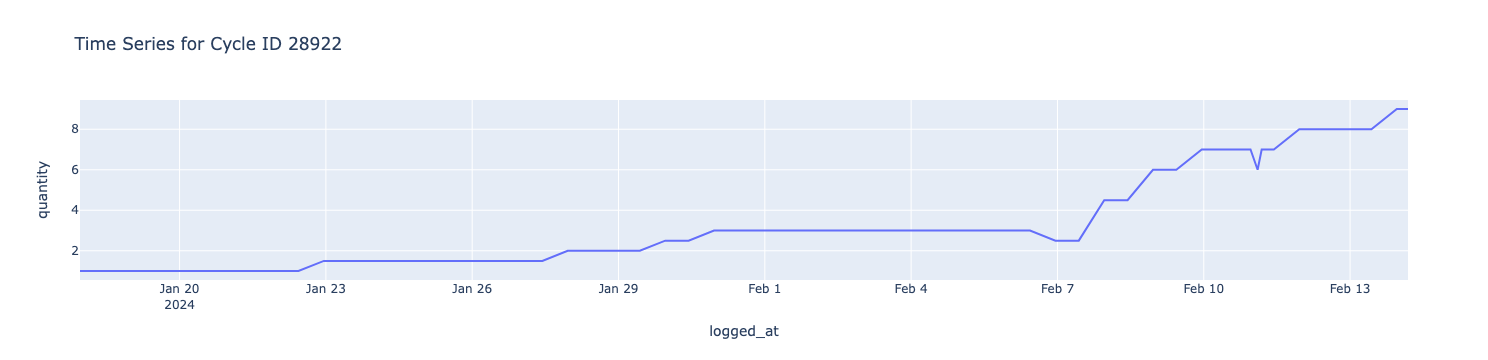

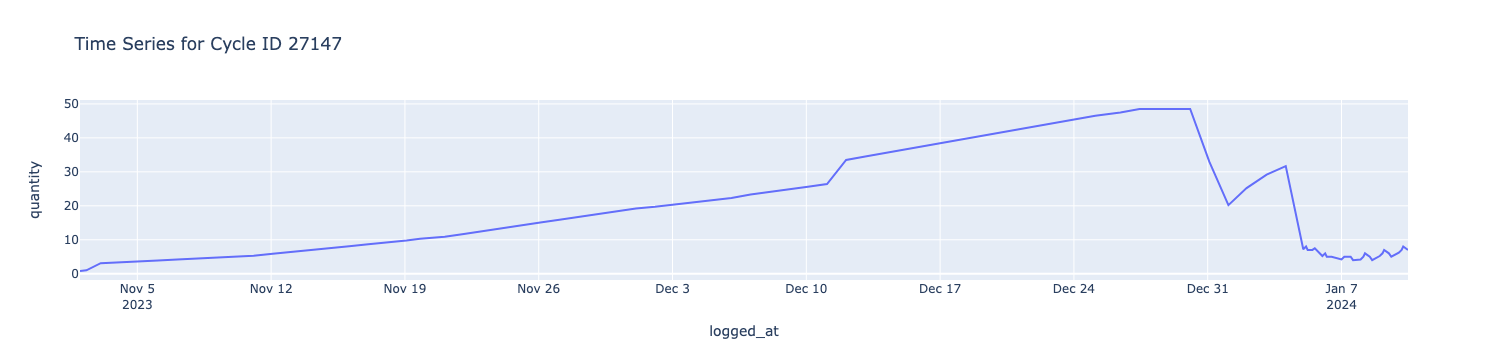

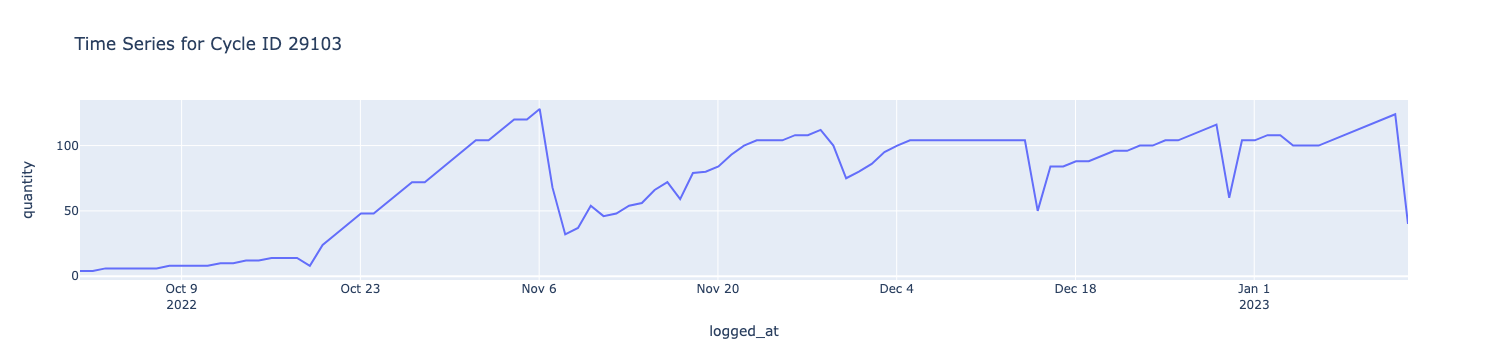

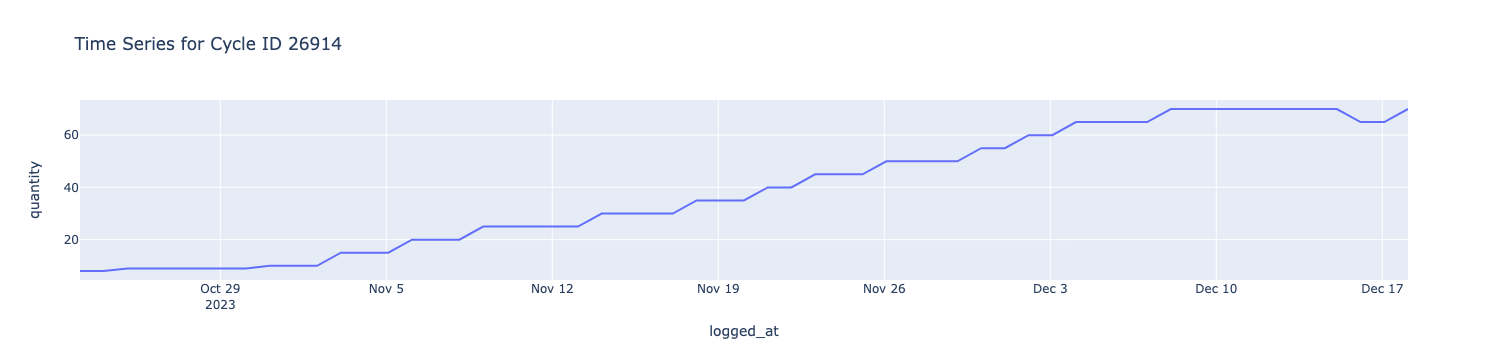

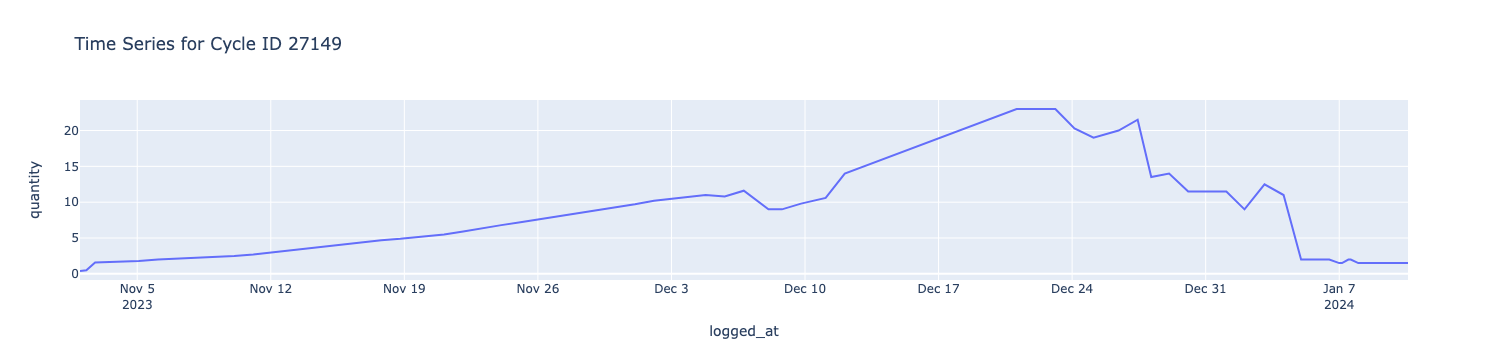

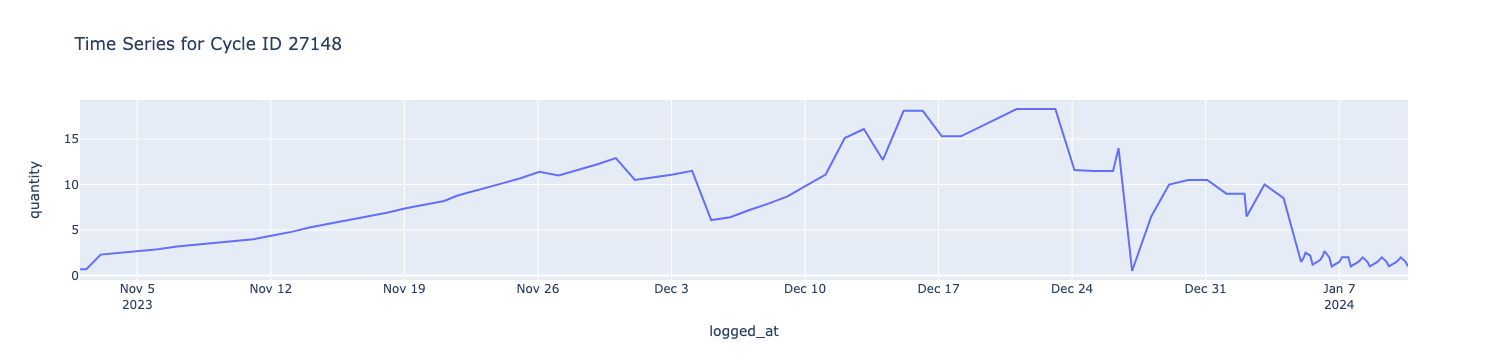

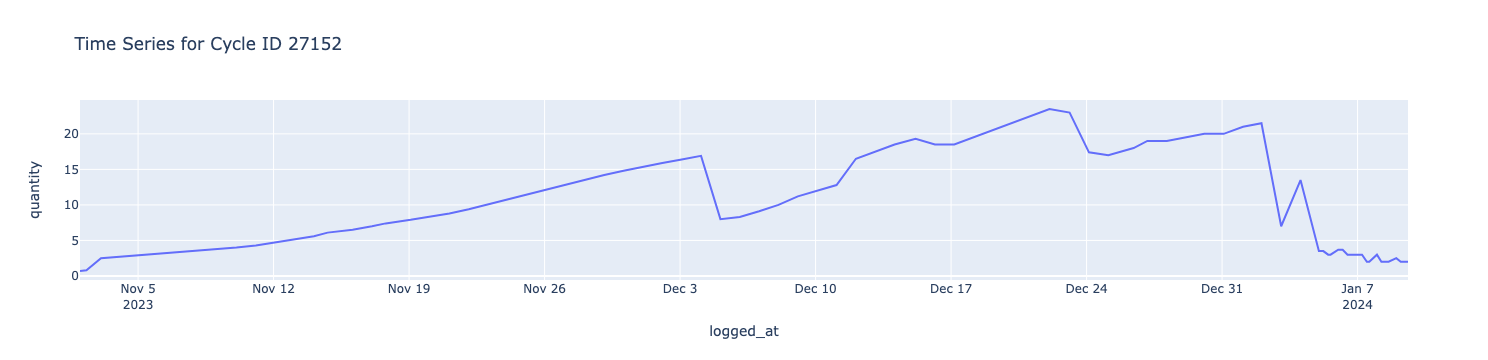

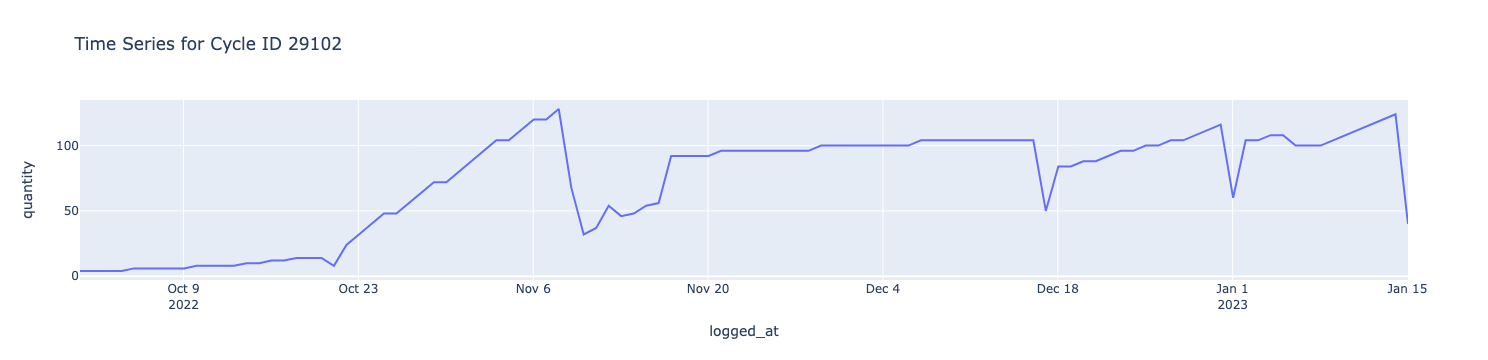

In [132]:
unique_cycles = df_feed_cyles['cycle_id'].unique()
for cycle_id in unique_cycles:
    plot_cycle(df_feed_cyles.sort_values('logged_at'), cycle_id)

### B. Fasting on Cycles

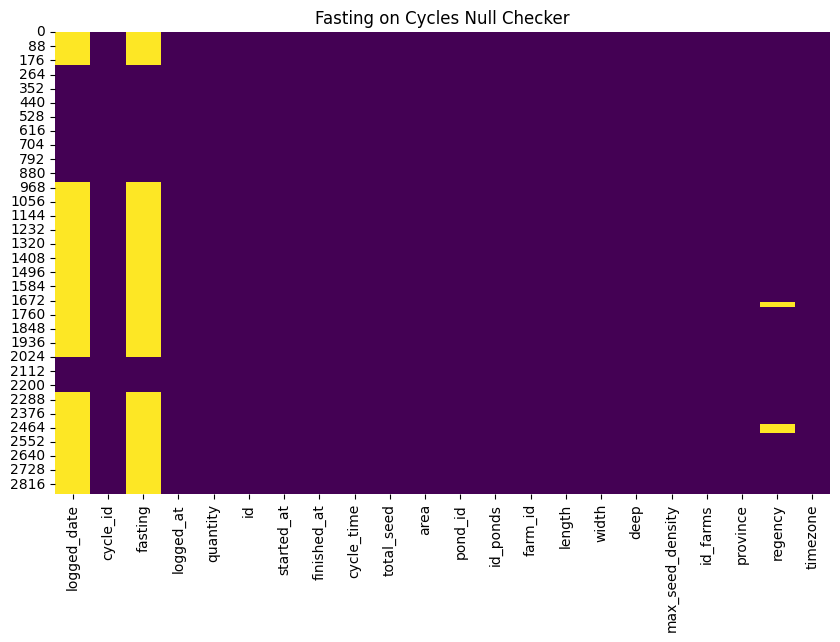

In [167]:
df_fasting_cycles = pd.merge(
    dataframes['combined_fastings'], df_feed_cyles,
    left_on='cycle_id', right_on='cycle_id',
    how='right', suffixes=('', '_cycle')
)

plot_missin_data_heatmap(df_fasting_cycles, "Fasting on Cycles Null Checker")

In [168]:
df_fasting_cycles.sort_values('logged_date')[['cycle_id', 'logged_at', 'logged_date', 'fasting', 'quantity']]

cycle_id           logged_at logged_date  fasting  quantity
2169   28922.0 2024-02-05 02:30:00  2024-01-18      1.0       3.0
2141   28922.0 2024-01-30 10:30:00  2024-01-18      1.0       2.5
2143   28922.0 2024-02-01 23:00:00  2024-01-18      1.0       3.0
2073   28922.0 2024-01-19 10:30:00  2024-01-18      1.0       1.0
2145   28922.0 2024-02-02 02:30:00  2024-01-18      1.0       3.0
...        ...                 ...         ...      ...       ...
2872   29102.0 2022-11-21 01:00:00         NaT      NaN      96.0
2873   29102.0 2022-11-20 01:00:00         NaT      NaN      92.0
2874   29102.0 2022-11-19 01:00:00         NaT      NaN      92.0
2875   29102.0 2022-11-18 01:00:00         NaT      NaN      92.0
2876   29102.0 2022-11-17 01:00:00         NaT      NaN      92.0

[2877 rows x 5 columns]

In [169]:
import pandas as pd
import plotly.graph_objects as go


In [183]:

def plot_fasting_time(df, cycle_id):
    fig = go.Figure()
    
    d = df[df['cycle_id'] == cycle_id]
    fig.add_trace(go.Scatter(x=d['logged_at'], y=d['quantity'], mode='lines', name='Quantity'))
    
    # Tambahkan garis vertikal untuk tanggal-tanggal fasting
    fasting_dates = d[d['fasting'] == 1]['logged_date'].dropna().unique()
    for date in fasting_dates:
        fig.add_vline(x=date, line_width=2, line_dash="dash", line_color='red')
    
    fig.update_layout(
        title='Feed Quantity Over Time with Fasting Periods',
        xaxis_title='Date',
        yaxis_title='Quantity',
        xaxis_rangeslider_visible=True  # Opsional: tambahkan rangeslider untuk memudahkan navigasi waktu
    )
    fig.show()

In [184]:
df_fasting_cycles.cycle_id.unique()

array([29100., 29099., 28943., 27146., 29101., 29109., 29108., 27150.,
       27153., 29107., 27151., 26913., 29105., 29110., 29104., 28922.,
       27147., 29103., 26914., 27149., 27148., 27152., 29102.])

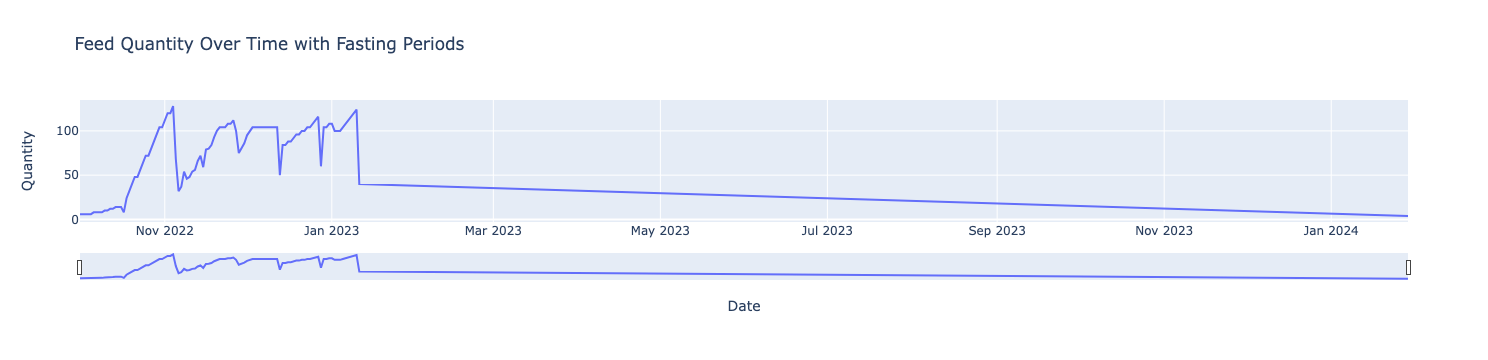

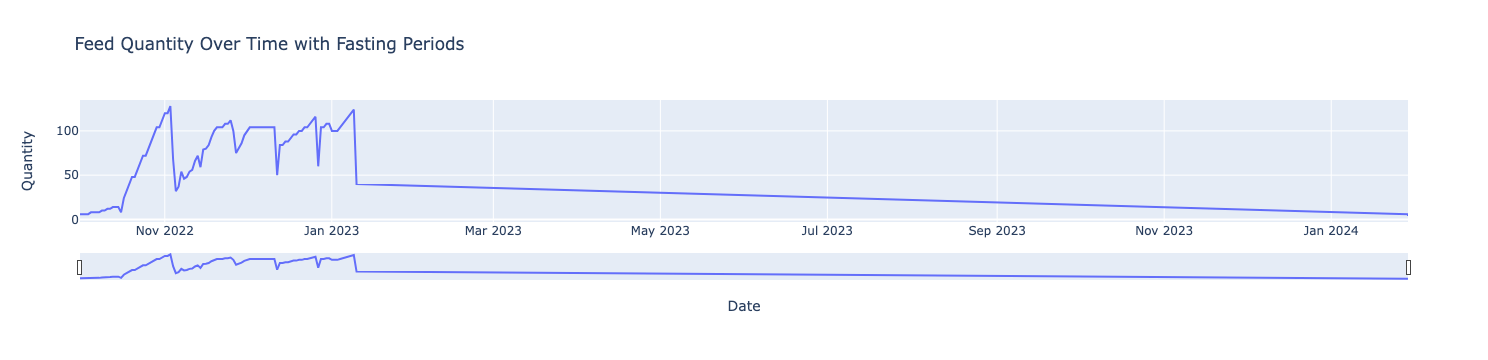

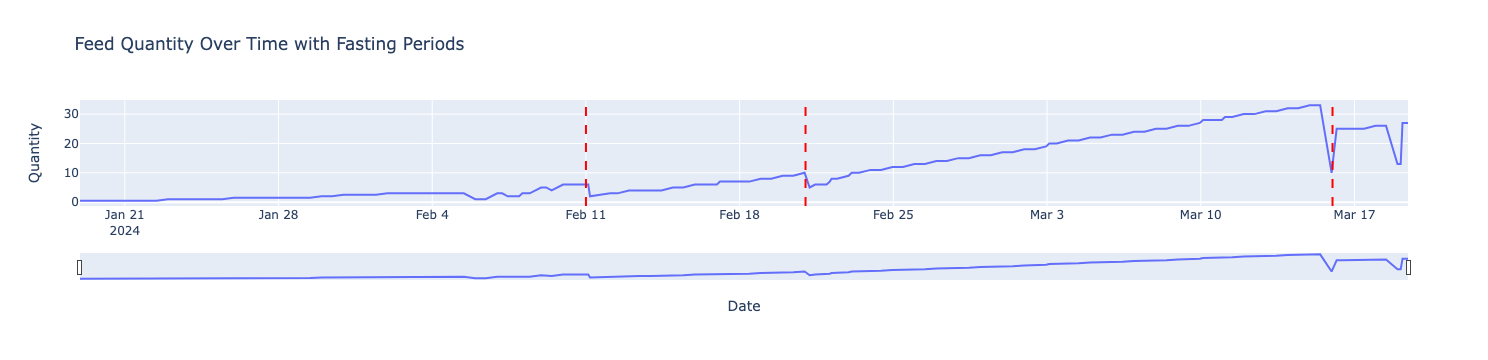

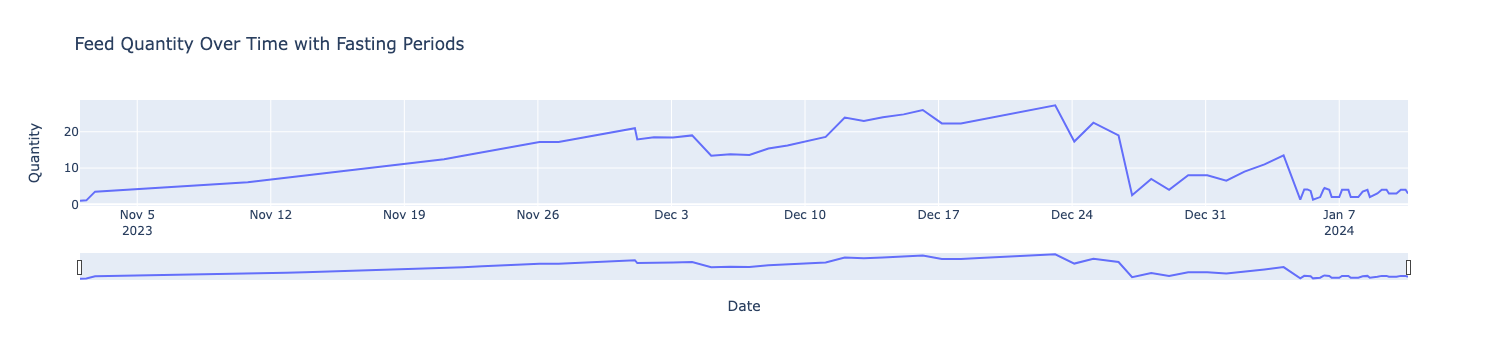

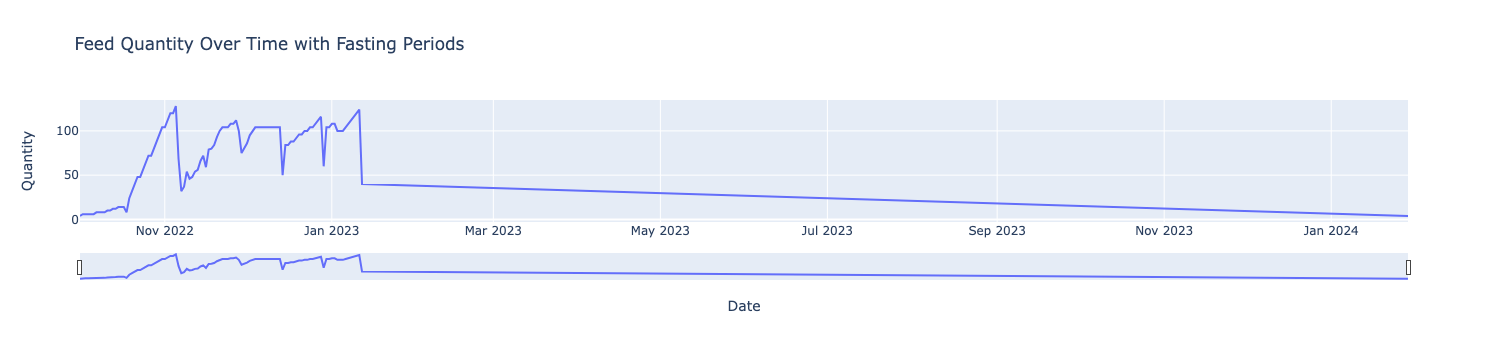

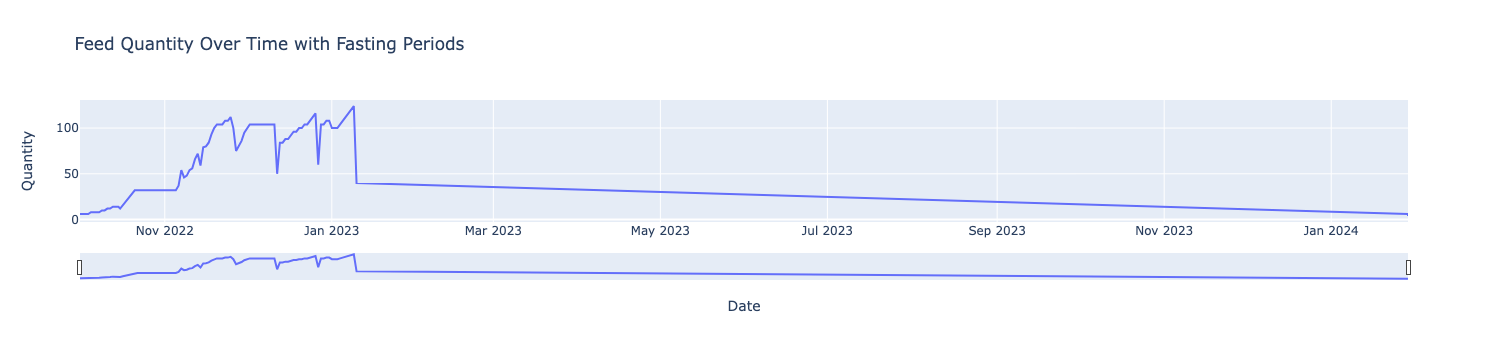

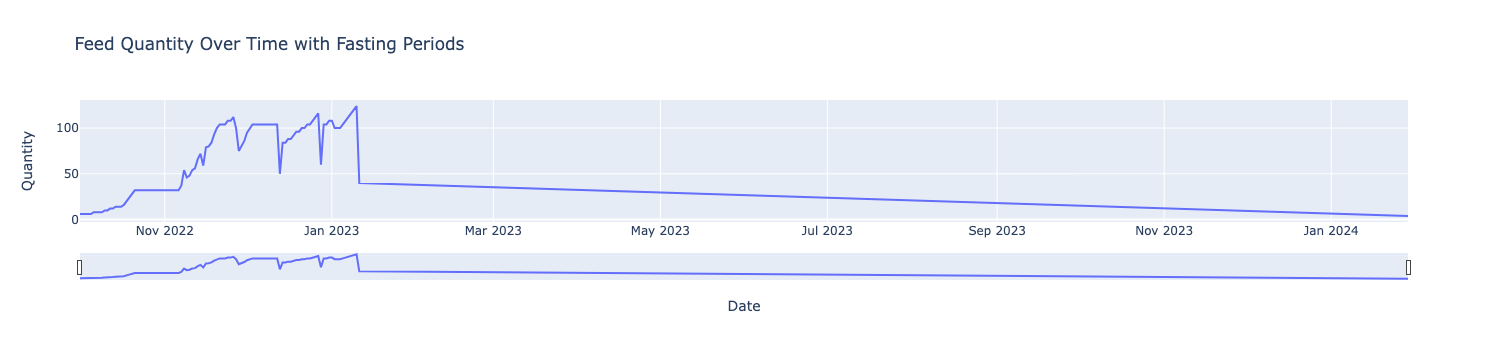

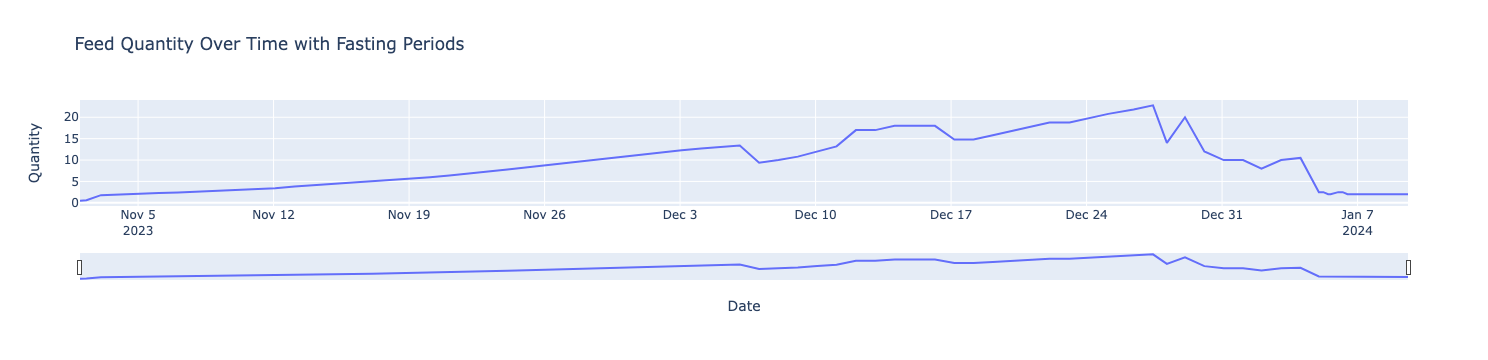

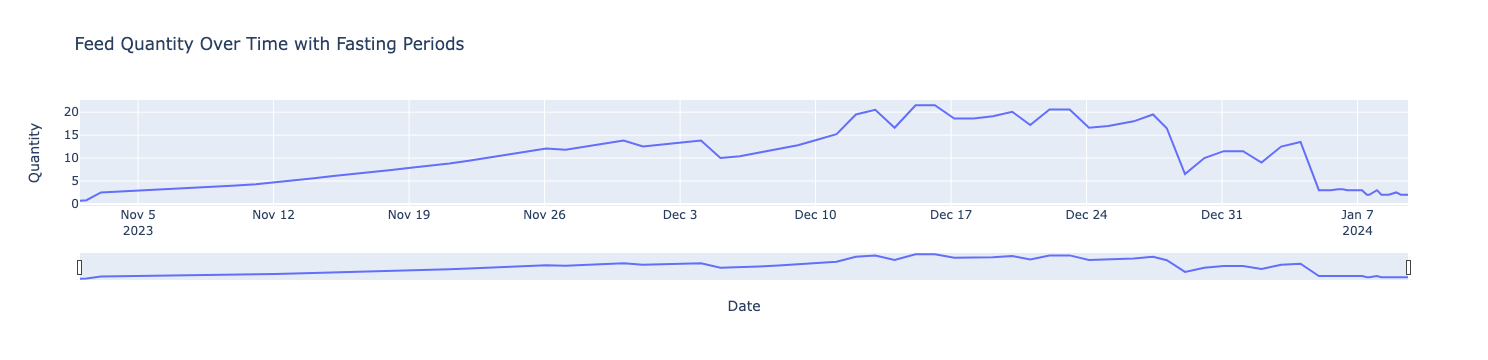

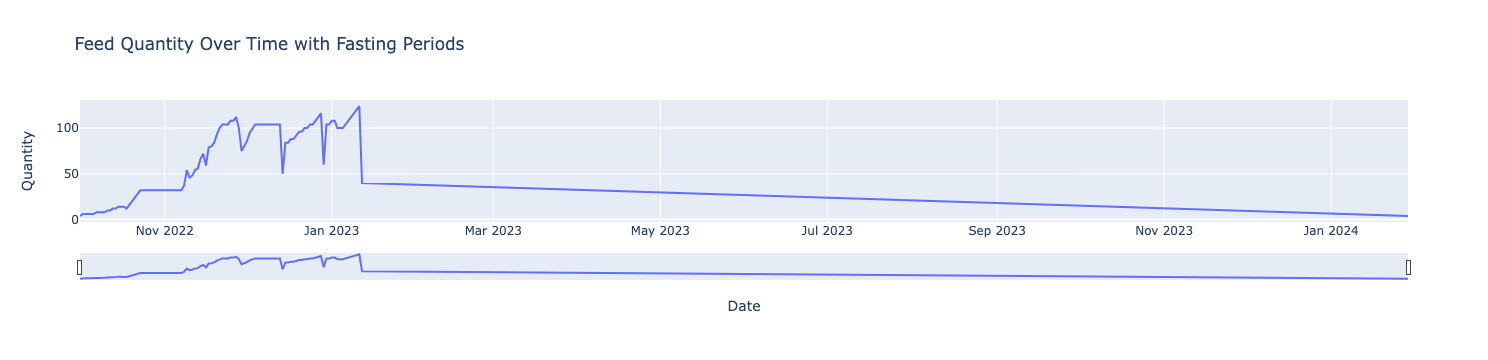

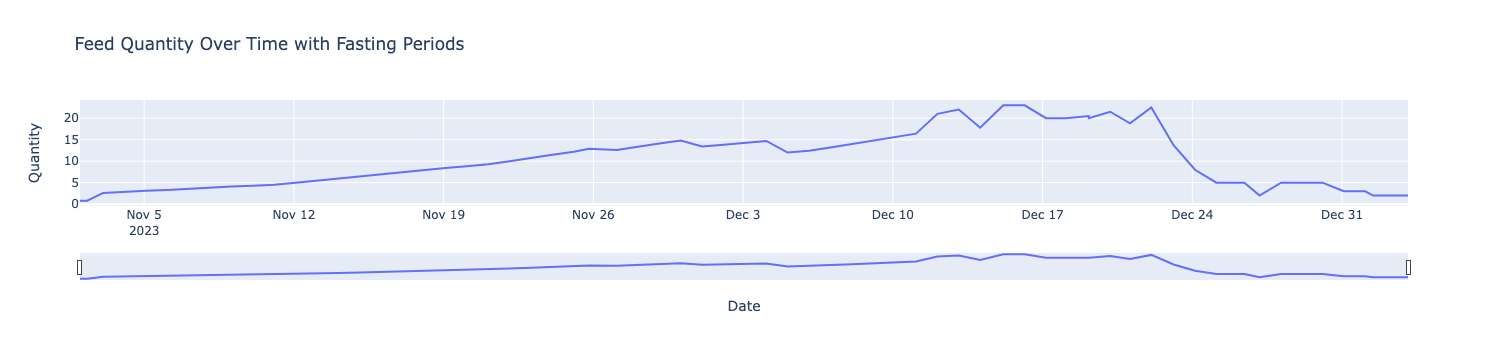

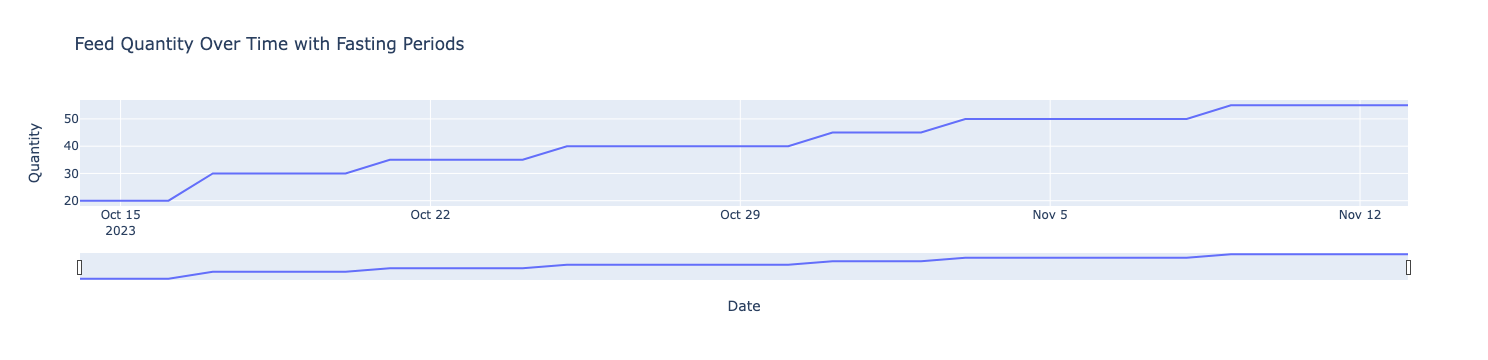

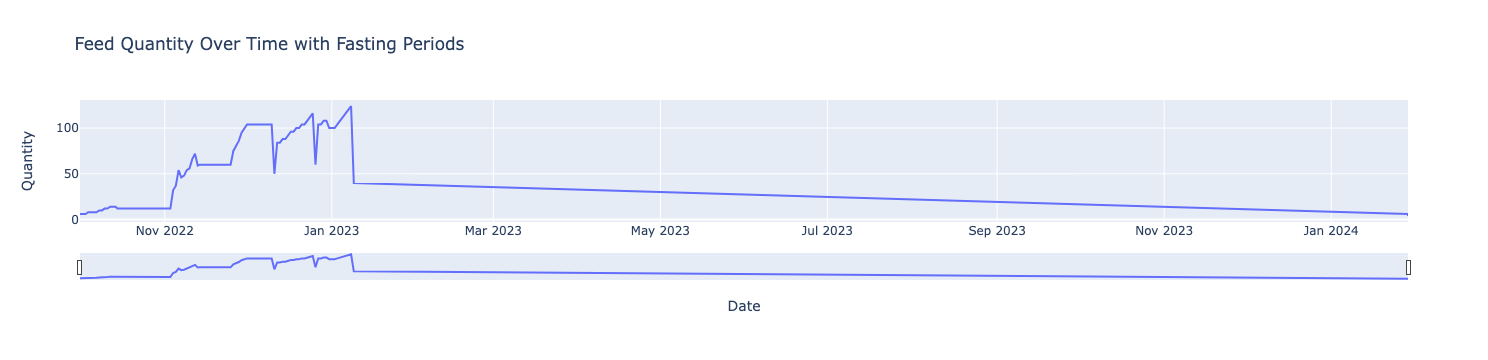

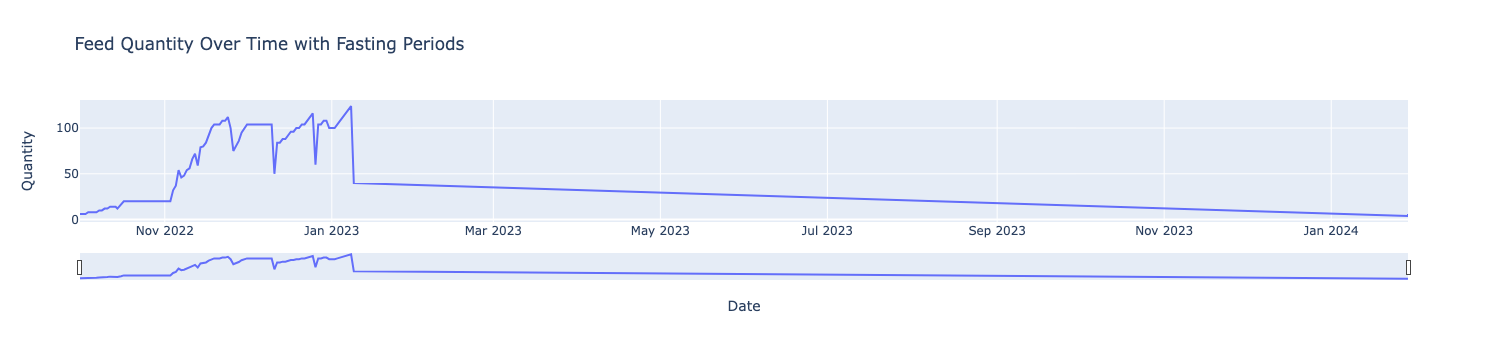

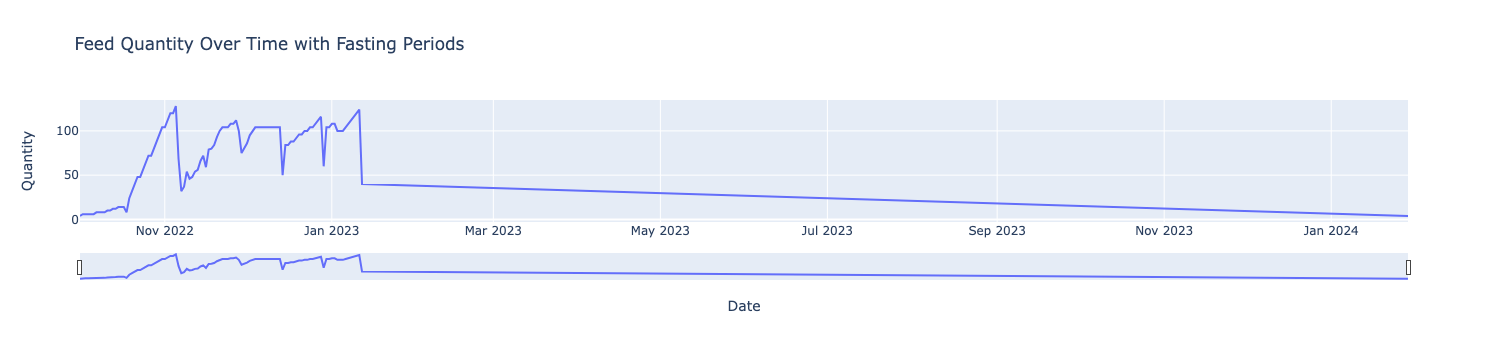

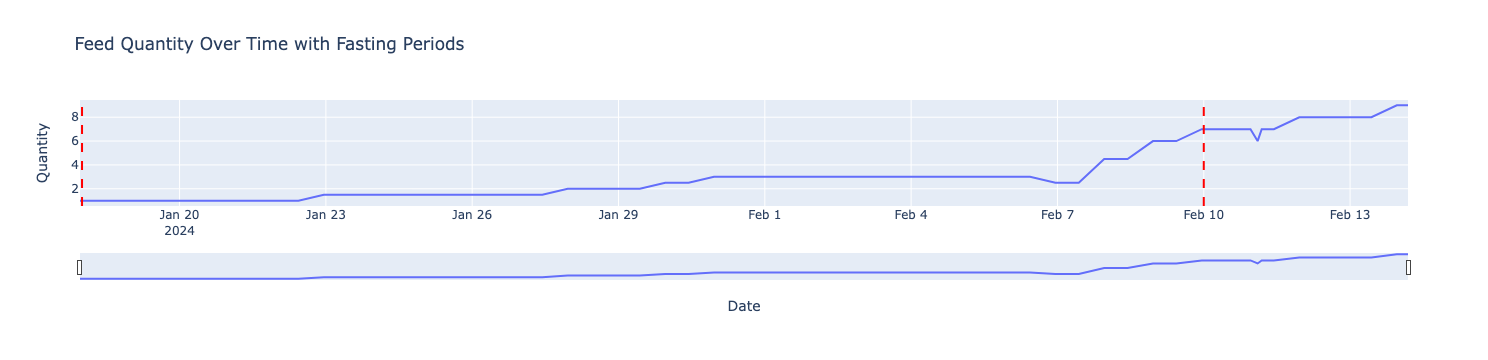

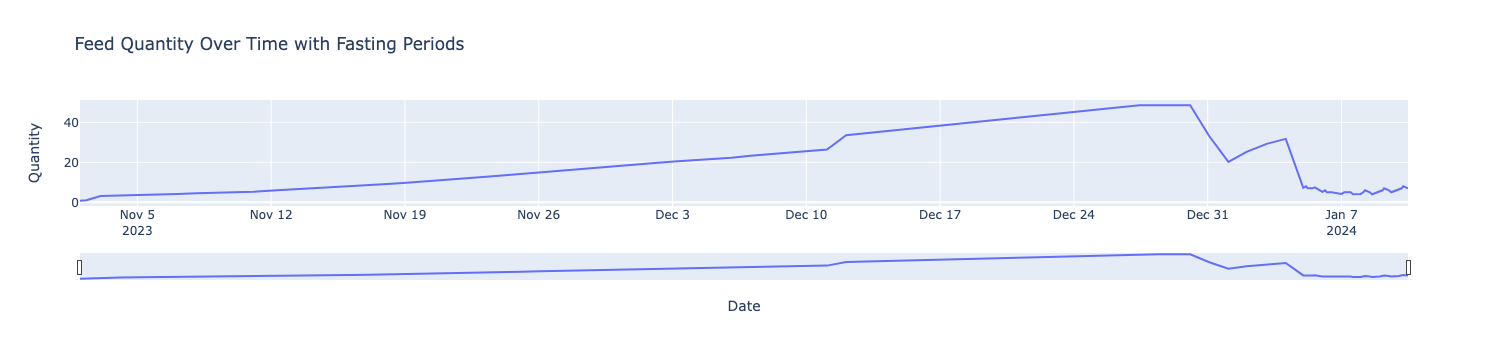

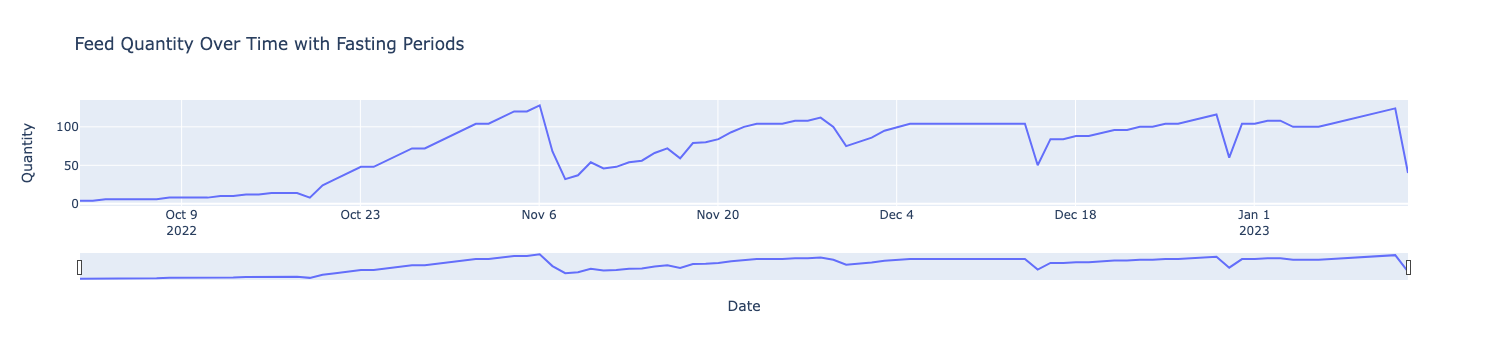

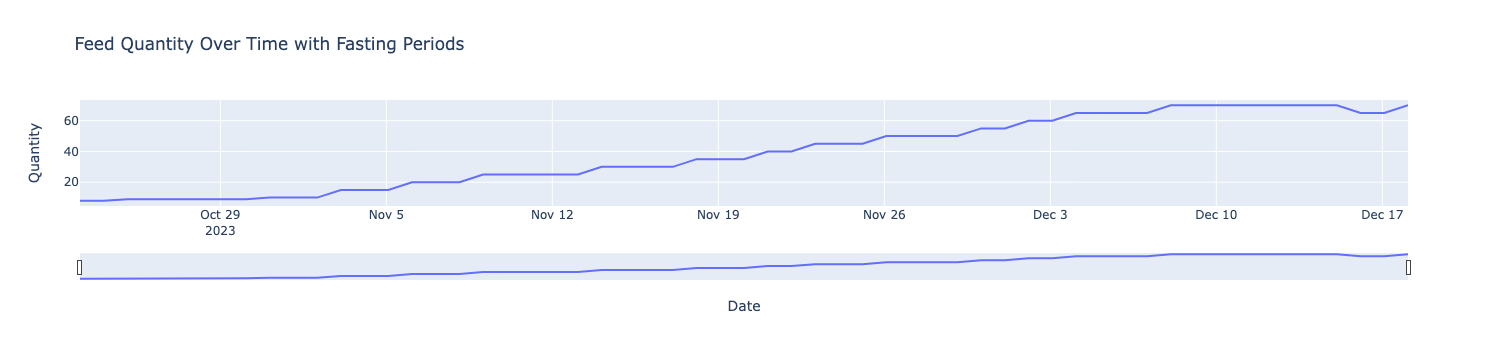

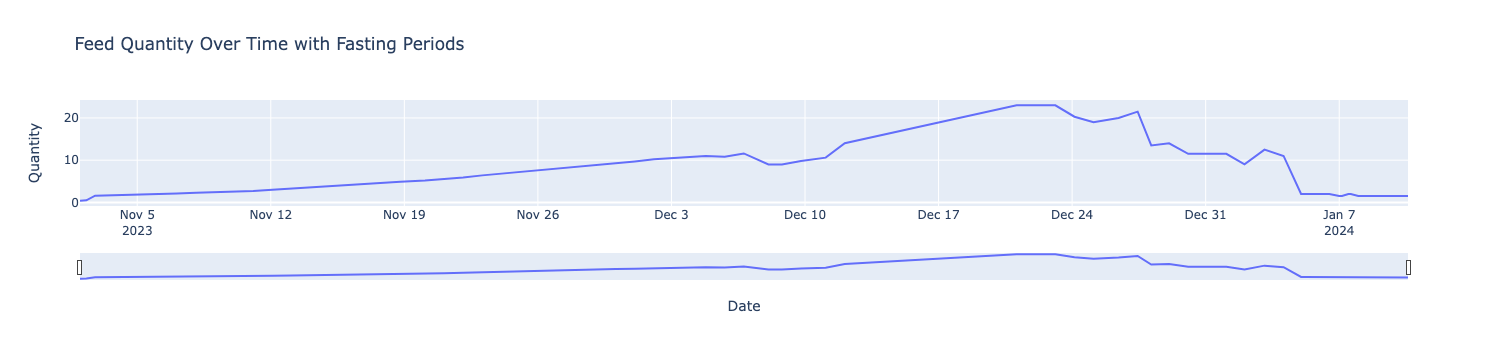

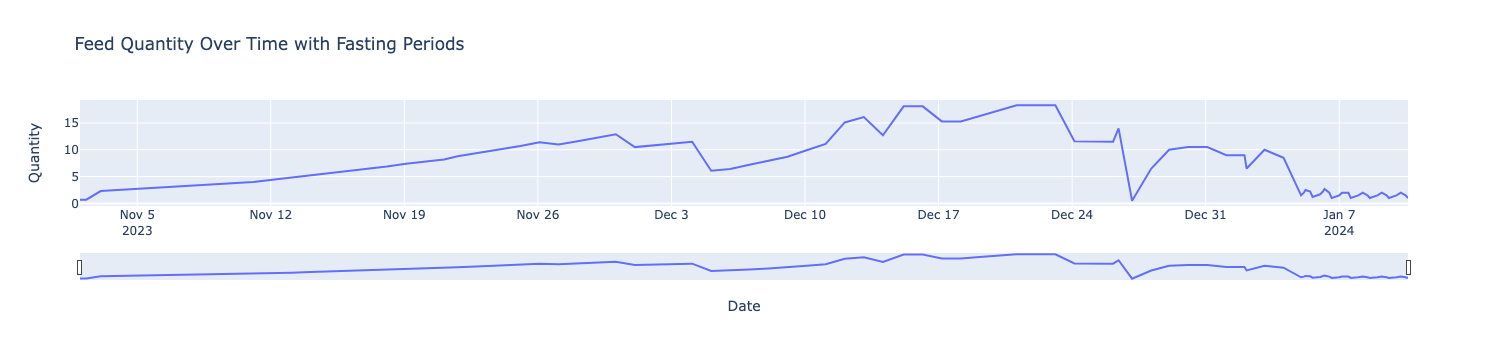

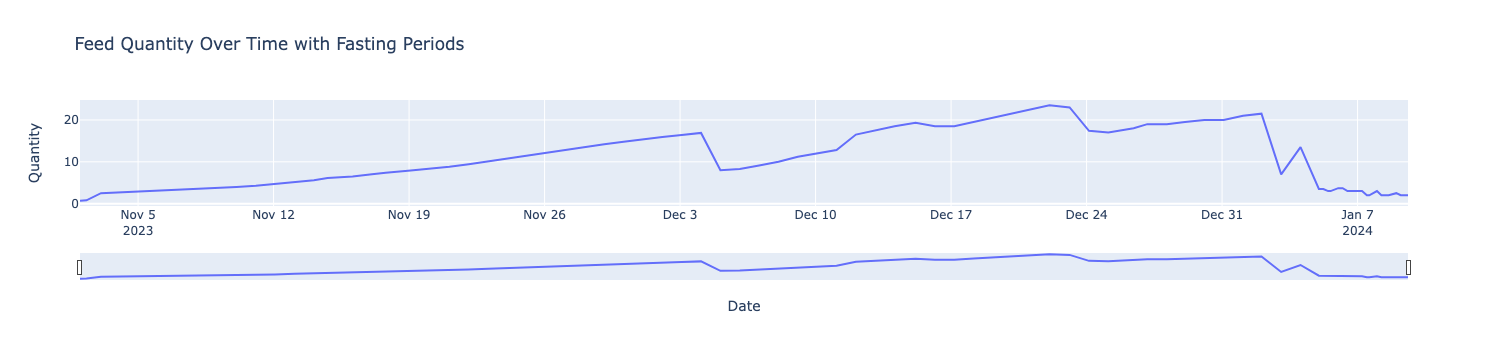

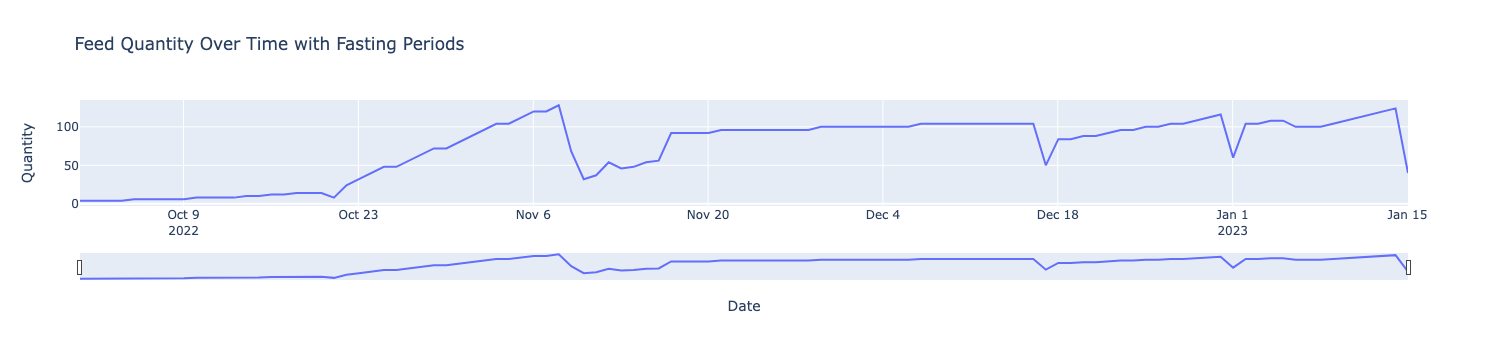

In [185]:
for cycle_id in df_fasting_cycles.cycle_id.unique():
    plot_fasting_time(df_fasting_cycles.sort_values('logged_at'), cycle_id)

### C. Mortalities on cycles

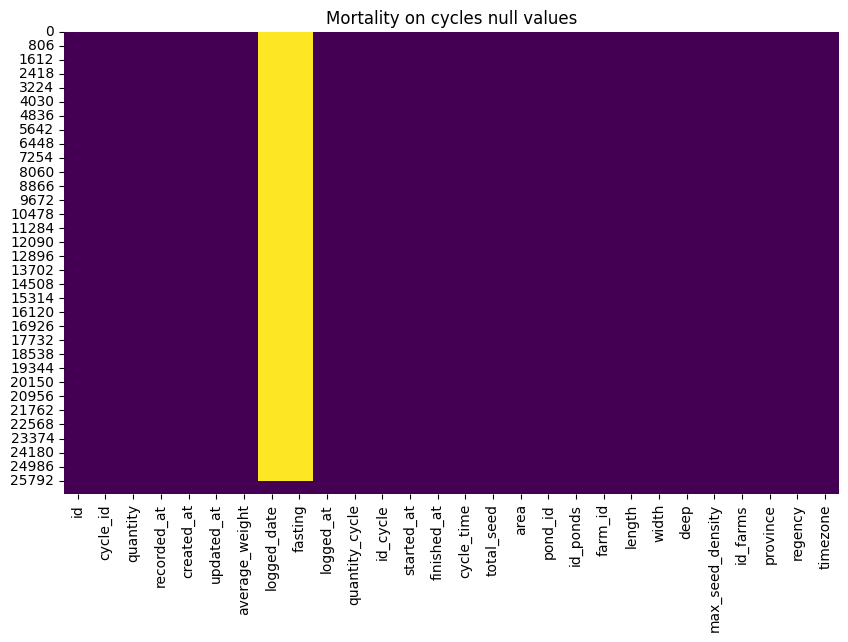

In [197]:
df_mortality_cycles = pd.merge(
    dataframes['mortalities'], df_fasting_cycles,
    left_on='cycle_id', right_on='cycle_id',
    how='inner', suffixes=('', '_cycle')
)
plot_missin_data_heatmap(df_mortality_cycles, "Mortality on cycles null values")

In [201]:
df_mortality_cycles

id  cycle_id  quantity recorded_at          created_at  \
0      20810     27151      1176  2023-12-04 2023-12-05 15:10:15   
1      20810     27151      1176  2023-12-04 2023-12-05 15:10:15   
2      20810     27151      1176  2023-12-04 2023-12-05 15:10:15   
3      20810     27151      1176  2023-12-04 2023-12-05 15:10:15   
4      20810     27151      1176  2023-12-04 2023-12-05 15:10:15   
...      ...       ...       ...         ...                 ...   
26562  24745     28943      2240  2024-03-19 2024-03-22 08:32:24   
26563  24745     28943      2240  2024-03-19 2024-03-22 08:32:24   
26564  24745     28943      2240  2024-03-19 2024-03-22 08:32:24   
26565  24745     28943      2240  2024-03-19 2024-03-22 08:32:24   
26566  24745     28943      2240  2024-03-19 2024-03-22 08:32:24   

               updated_at  average_weight logged_date  fasting  \
0     2024-01-08 11:40:40            1.70         NaT      NaN   
1     2024-01-08 11:40:40            1.70         NaT      NaN   
2     2024-01-08 11:40:40            1.70         NaT      NaN   
3     2024-01-08 11:40:40            1.70         NaT      NaN   
4     2024-01-08 11:40:40            1.70         NaT      NaN   
...                   ...             ...         ...      ...   
26562 2024-03-22 08:36:26            8.93  2024-02-21      1.0   
26563 2024-03-22 08:36:26            8.93  2024-03-16      1.0   
26564 2024-03-22 08:36:26            8.93  2024-02-11      1.0   
26565 2024-03-22 08:36:26            8.93  2024-02-21      1.0   
26566 2024-03-22 08:36:26            8.93  2024-03-16      1.0   

                logged_at  ...  id_ponds  farm_id length  width deep  \
0     2023-11-02 00:00:00  ...     44588    12545   30.0  28.00  1.3   
1     2023-11-02 04:00:00  ...     44588    12545   30.0  28.00  1.3   
2     2023-11-02 08:00:00  ...     44588    12545   30.0  28.00  1.3   
3     2023-11-03 02:00:00  ...     44588    12545   30.0  28.00  1.3   
4     2023-11-04 02:00:00  ...     44588    12545   30.0  28.00  1.3   
...                   ...  ...       ...      ...    ...    ...  ...   
26562 2024-03-19 10:30:00  ...     44548    12537   40.0  30.06  1.3   
26563 2024-03-19 10:30:00  ...     44548    12537   40.0  30.06  1.3   
26564 2024-02-13 10:30:00  ...     44548    12537   40.0  30.06  1.3   
26565 2024-02-13 10:30:00  ...     44548    12537   40.0  30.06  1.3   
26566 2024-02-13 10:30:00  ...     44548    12537   40.0  30.06  1.3   

       max_seed_density  id_farms        province       regency  timezone  
0            141.176471     12545      JAWA TIMUR       PACITAN    +07:00  
1            141.176471     12545      JAWA TIMUR       PACITAN    +07:00  
2            141.176471     12545      JAWA TIMUR       PACITAN    +07:00  
3            141.176471     12545      JAWA TIMUR       PACITAN    +07:00  
4            141.176471     12545      JAWA TIMUR       PACITAN    +07:00  
...                 ...       ...             ...           ...       ...  
26562        266.467066     12537  SULAWESI BARAT  MAMUJU UTARA    +08:00  
26563        266.467066     12537  SULAWESI BARAT  MAMUJU UTARA    +08:00  
26564        266.467066     12537  SULAWESI BARAT  MAMUJU UTARA    +08:00  
26565        266.467066     12537  SULAWESI BARAT  MAMUJU UTARA    +08:00  
26566        266.467066     12537  SULAWESI BARAT  MAMUJU UTARA    +08:00  

[26567 rows x 28 columns]

### D. Harvests on cycles

In [294]:
df_harvests = dataframes['harvests'].copy()

In [296]:
df_harvests = df_harvests.drop(['created_at', 'updated_at'], axis=1)

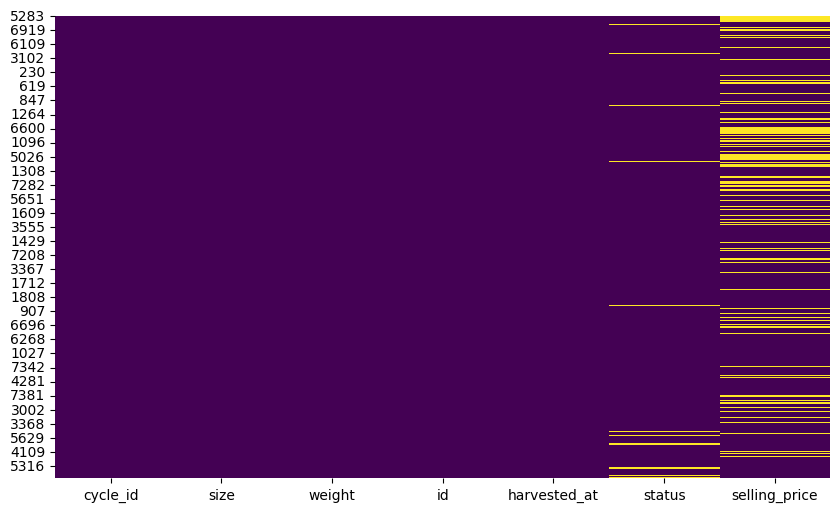

In [299]:
plot_missin_data_heatmap(df_harvests.sort_values('harvested_at'), '')

In [315]:
df_harvests.sort_values('cycle_id')[df_harvests['status']!='Failed']

/var/folders/zz/htmnld_148b1dbm4wj_hyrq80000gn/T/ipykernel_46742/834336915.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



cycle_id  size   weight       id harvested_at   status  selling_price
4666      3458  41.0  3030.00   2286.0   2020-06-27     Full            NaN
4665      3458  49.0  1206.00   2199.0   2020-06-13  Partial            NaN
4664      3458  71.0  1503.80   2088.0   2020-05-26  Partial            NaN
4663      3458  94.0  1643.13   2053.0   2020-05-13  Partial            NaN
1831      3459  37.0  3144.18   2327.0   2020-07-06     Full            NaN
...        ...   ...      ...      ...          ...      ...            ...
2059     29679  61.4   127.00  28248.0   2024-03-12  Partial            NaN
2060     29679  50.6   241.00  28252.0   2024-03-28     Full            NaN
2061     29679  50.6   241.00  28256.0   2024-03-28     Full            NaN
7514     29873  85.0  1038.00  28263.0   2024-03-25     Full     57401400.0
3013     29874  70.0   661.50  28264.0   2024-03-25     Full     39690000.0

[7919 rows x 7 columns]

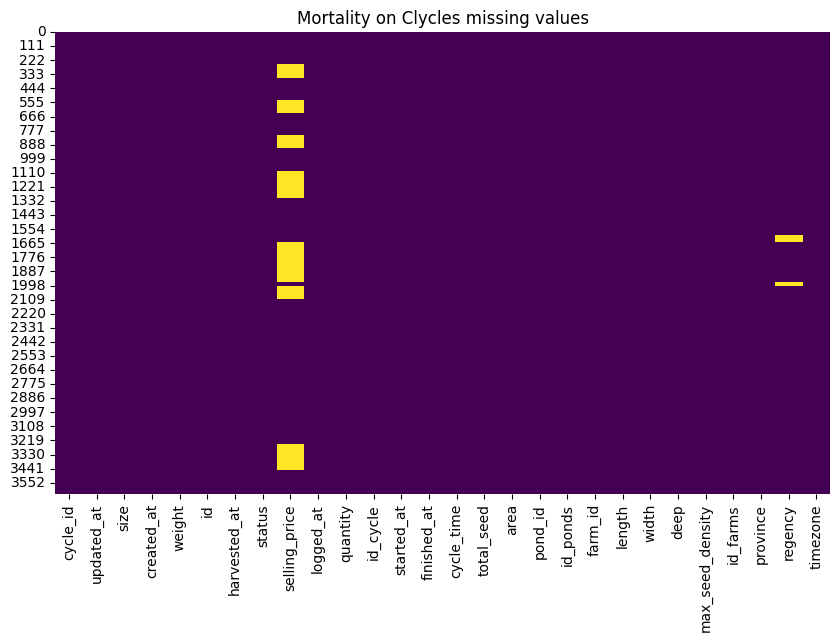

In [202]:
df_harvest_cycles = pd.merge(
    dataframes['harvests'], df_feed_cyles,
    left_on='cycle_id', right_on='cycle_id',
    how='inner', suffixes=('', '_cycle')
)
plot_missin_data_heatmap(df_harvest_cycles, "Mortality on Clycles missing values")

In [203]:
df_harvest_cycles.insert(
    loc=df_harvest_cycles.columns.get_loc('selling_price') + 1, 
    column="price_per_kg",
    value=(df_harvest_cycles.selling_price / df_harvest_cycles.weight)
)

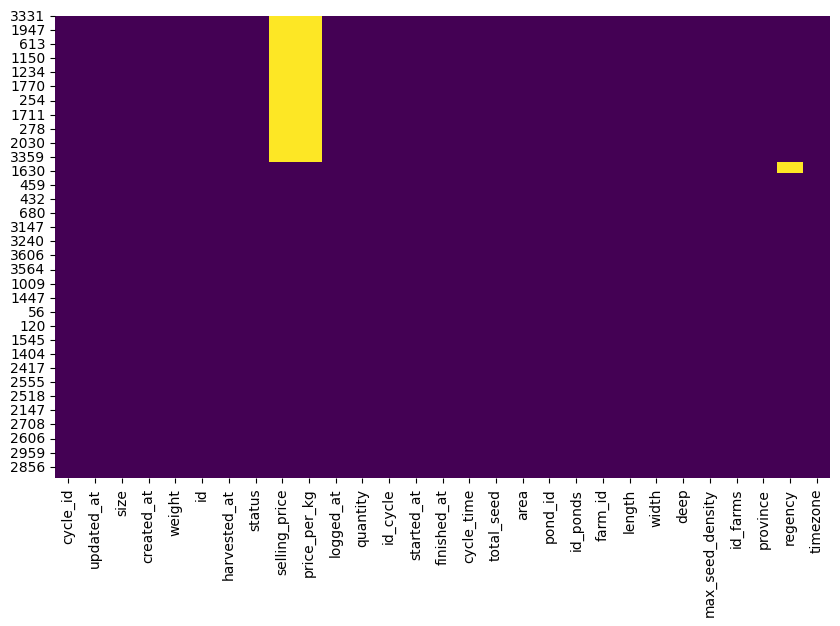

In [204]:
plot_missin_data_heatmap(df_harvest_cycles.sort_values('harvested_at'), '')

In [205]:
df_harvest_cycles

cycle_id          updated_at   size          created_at  weight  \
0        27148 2024-01-12 02:12:55  230.0 2024-01-12 02:12:55    37.2   
1        27148 2024-01-12 02:12:55  230.0 2024-01-12 02:12:55    37.2   
2        27148 2024-01-12 02:12:55  230.0 2024-01-12 02:12:55    37.2   
3        27148 2024-01-12 02:12:55  230.0 2024-01-12 02:12:55    37.2   
4        27148 2024-01-12 02:12:55  230.0 2024-01-12 02:12:55    37.2   
...        ...                 ...    ...                 ...     ...   
3637     27147 2024-01-12 02:11:06  140.0 2024-01-12 02:11:06  1003.5   
3638     27147 2024-01-12 02:11:06  140.0 2024-01-12 02:11:06  1003.5   
3639     27147 2024-01-12 02:11:06  140.0 2024-01-12 02:11:06  1003.5   
3640     27147 2024-01-12 02:11:06  140.0 2024-01-12 02:11:06  1003.5   
3641     27147 2024-01-12 02:11:06  140.0 2024-01-12 02:11:06  1003.5   

           id harvested_at status  selling_price  price_per_kg  ... id_ponds  \
0     25576.0   2024-01-11   Full       930000.0       25000.0  ...    44516   
1     25576.0   2024-01-11   Full       930000.0       25000.0  ...    44516   
2     25576.0   2024-01-11   Full       930000.0       25000.0  ...    44516   
3     25576.0   2024-01-11   Full       930000.0       25000.0  ...    44516   
4     25576.0   2024-01-11   Full       930000.0       25000.0  ...    44516   
...       ...          ...    ...            ...           ...  ...      ...   
3637  25575.0   2024-01-11   Full     41143500.0       41000.0  ...    44515   
3638  25575.0   2024-01-11   Full     41143500.0       41000.0  ...    44515   
3639  25575.0   2024-01-11   Full     41143500.0       41000.0  ...    44515   
3640  25575.0   2024-01-11   Full     41143500.0       41000.0  ...    44515   
3641  25575.0   2024-01-11   Full     41143500.0       41000.0  ...    44515   

      farm_id  length width deep max_seed_density  id_farms    province  \
0       12530    29.0  28.0  1.3       129.310345     12530  JAWA TIMUR   
1       12530    29.0  28.0  1.3       129.310345     12530  JAWA TIMUR   
2       12530    29.0  28.0  1.3       129.310345     12530  JAWA TIMUR   
3       12530    29.0  28.0  1.3       129.310345     12530  JAWA TIMUR   
4       12530    29.0  28.0  1.3       129.310345     12530  JAWA TIMUR   
...       ...     ...   ...  ...              ...       ...         ...   
3637    12530    30.0  29.0  1.3       160.919540     12530  JAWA TIMUR   
3638    12530    30.0  29.0  1.3       160.919540     12530  JAWA TIMUR   
3639    12530    30.0  29.0  1.3       160.919540     12530  JAWA TIMUR   
3640    12530    30.0  29.0  1.3       160.919540     12530  JAWA TIMUR   
3641    12530    30.0  29.0  1.3       160.919540     12530  JAWA TIMUR   

      regency  timezone  
0     PACITAN    +07:00  
1     PACITAN    +07:00  
2     PACITAN    +07:00  
3     PACITAN    +07:00  
4     PACITAN    +07:00  
...       ...       ...  
3637  PACITAN    +07:00  
3638  PACITAN    +07:00  
3639  PACITAN    +07:00  
3640  PACITAN    +07:00  
3641  PACITAN    +07:00  

[3642 rows x 29 columns]

### E. Measurements on cycles

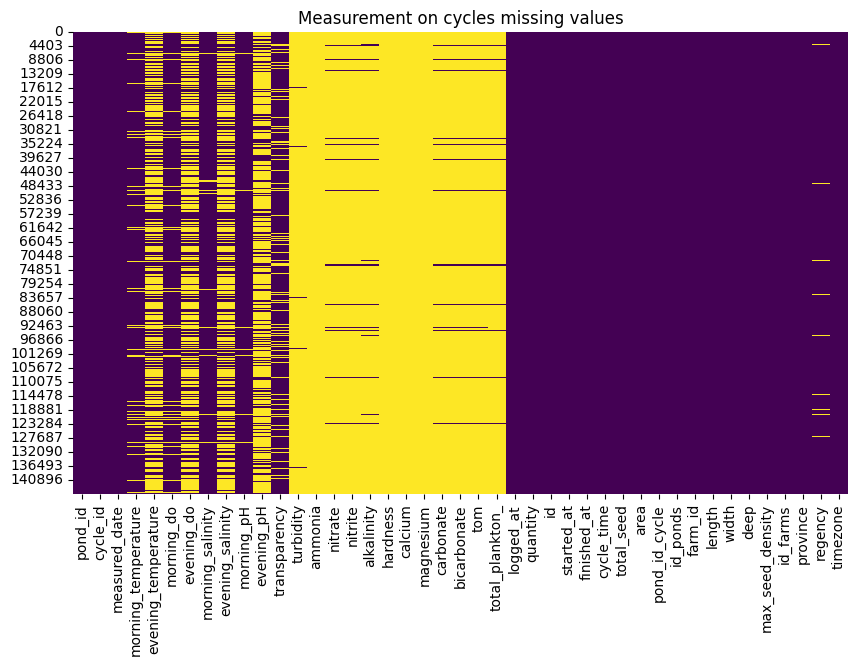

In [206]:
df_measurement_cycles = pd.merge(
    dataframes['measurements'], df_feed_cyles,
    left_on='cycle_id', right_on='cycle_id',
    how='inner', suffixes=('', '_cycle')
) 
plot_missin_data_heatmap(df_measurement_cycles, "Measurement on cycles missing values")

### F. Sampling on Cycles

In [273]:
df_samplings = dataframes['samplings'].copy()

In [277]:
df_samplings = df_samplings.drop(['created_at', 'updated_at', 'remark'], axis=1)

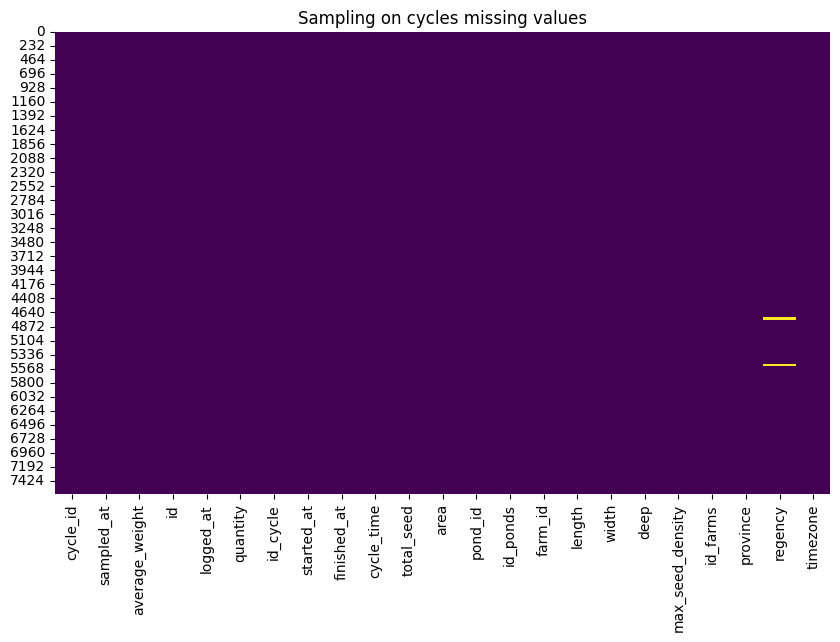

In [278]:
df_sampling_cycles = pd.merge(
    df_samplings, df_feed_cyles,
    left_on='cycle_id', right_on='cycle_id',
    how='inner', suffixes=('', '_cycle')
)

plot_missin_data_heatmap(df_sampling_cycles, "Sampling on cycles missing values")

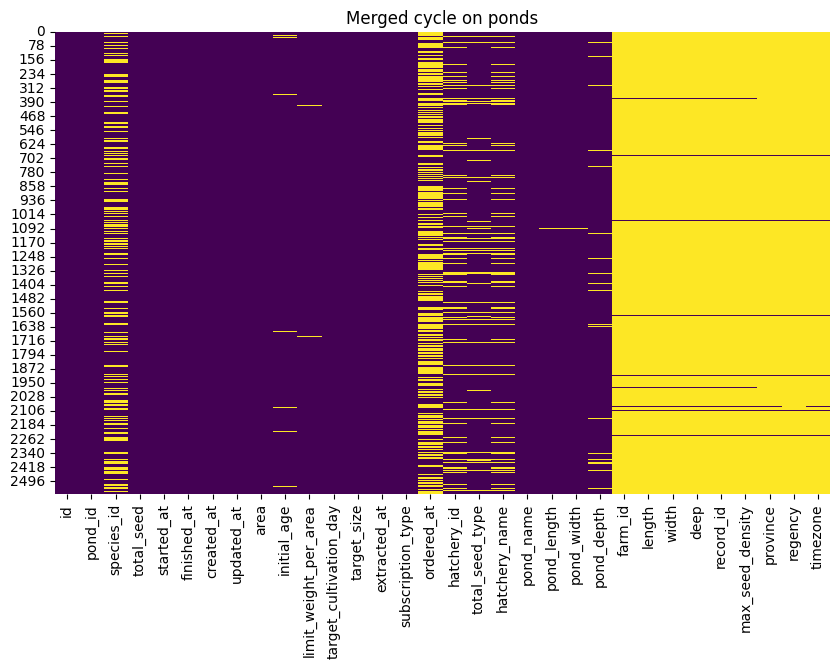

In [39]:
df_cycle_ponds = pd.merge(dataframes['cycles'], df_pond_farms, how='left', left_on='pond_id', right_on='id', suffixes=('', '_drop'))
df_cycle_ponds = df_cycle_ponds.loc[:, ~df_cycle_ponds.columns.str.endswith('_drop')]
plot_missin_data_heatmap(df_cycle_ponds, 'Merged cycle on ponds')

In [71]:
df_cycle_ponds[df_cycle_ponds['pond_id'] == 38249]

id  pond_id species_id  total_seed started_at finished_at  \
979   24040    38249        NaN      325000 2023-08-08  2023-10-18   
983   27695    38249        NaN      325000 2023-11-29  2024-01-12   
1000  20659    38249        NaN      325000 2023-03-13  2023-07-03   

              created_at          updated_at    area  initial_age  ...  \
979  2023-07-11 04:33:30 2023-10-22 05:49:21  2500.0          0.0  ...   
983  2023-11-24 06:08:12 2024-01-12 06:32:13  2500.0          0.0  ...   
1000 2023-02-02 09:36:22 2023-07-04 16:01:10  2500.0          0.0  ...   

      pond_depth  farm_id  length width deep record_id  max_seed_density  \
979          1.2      NaN     NaN   NaN  NaN       NaN               NaN   
983          1.2      NaN     NaN   NaN  NaN       NaN               NaN   
1000         1.2      NaN     NaN   NaN  NaN       NaN               NaN   

     province regency timezone  
979       NaN     NaN      NaN  
983       NaN     NaN      NaN  
1000      NaN     NaN      NaN  

[3 rows x 32 columns]

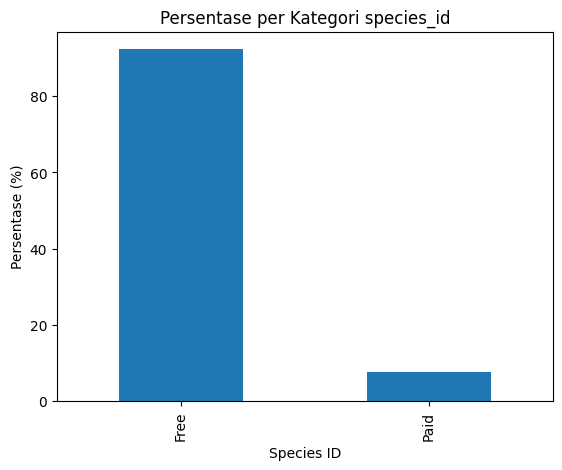

In [67]:
# Menghitung frekuensi relatif kategori dalam bentuk persentase
category_percentages = df_cycle_ponds['subscription_type'].value_counts(normalize=True) * 100

# Membuat bar plot
category_percentages.plot(kind='bar')

# Menambahkan judul dan label
plt.title('Persentase per Kategori species_id')
plt.xlabel('Species ID')
plt.ylabel('Persentase (%)')

# Menampilkan plot
plt.show()

# Perhitungan SR dan ADG
* Memerlukan data cyclus dan harvenst
* `SR = (n_awal - n_akhir) * 100`
* `ADG = (w_akhir - w_awal) / n_hari * 100`

## A. ADG

In [280]:
df_samplings[df_samplings['cycle_id'] == 27146]

cycle_id sampled_at  average_weight     id
8789     27146 2023-12-04             1.4  54349
8790     27146 2023-12-11             3.2  54682
8791     27146 2023-12-19             5.0  55256
8792     27146 2023-12-26             7.2  55760
8793     27146 2024-01-02             7.2  56102
8794     27146 2024-01-08             7.3  56395

In [290]:
df = df_samplings[df_samplings['cycle_id'] == 27146].copy()

df['weight_diff'] = df['average_weight'].diff()  # Perbedaan berat dari sampel sebelumnya
df['days_diff'] = df['sampled_at'].diff().dt.days  # Perbedaan hari dari sampel sebelumnya
df['ADG'] = df['weight_diff'] / df['days_diff']  # ADG per interval

In [291]:
df

cycle_id sampled_at  average_weight     id  weight_diff  days_diff  \
8789     27146 2023-12-04             1.4  54349          NaN        NaN   
8790     27146 2023-12-11             3.2  54682          1.8        7.0   
8791     27146 2023-12-19             5.0  55256          1.8        8.0   
8792     27146 2023-12-26             7.2  55760          2.2        7.0   
8793     27146 2024-01-02             7.2  56102          0.0        7.0   
8794     27146 2024-01-08             7.3  56395          0.1        6.0   

           ADG  
8789       NaN  
8790  0.257143  
8791  0.225000  
8792  0.314286  
8793  0.000000  
8794  0.016667

In [293]:
df.ADG.mean()

0.1626190476190476

## B. SR

In [330]:
df_harvests.insert(
    loc=df_harvests.columns.get_loc('weight') + 1,
    column='tails',
    value=(df_harvests.size * df_harvests.weight)
)

In [343]:
df_harvests.insert(
    loc=df_harvests.columns.get_loc('selling_price') + 1,
    column='price_per_kg',
    value=(df_harvests.selling_price / df_harvests.weight)
)

In [345]:
df_harvests

cycle_id    size  weight        tails       id harvested_at   status  \
0        15013  399.86    0.01       566.09  11960.0   2022-04-17   Failed   
1        11848  300.00   46.00   2604014.00   7520.0   2021-10-22     Full   
2        11848  300.00   10.00    566090.00   7546.0   2021-10-21  Partial   
3         4666  110.00  270.50  15312734.50   3009.0   2020-08-31   Failed   
4         4666  190.00  270.50  15312734.50   3010.0   2020-08-31   Failed   
...        ...     ...     ...          ...      ...          ...      ...   
8082     28500   90.00   12.00    679308.00  27731.0   2024-03-05     Full   
8083     28500  150.00    4.00    226436.00  27732.0   2024-02-02  Partial   
8084     11741   80.00  183.00  10359447.00   8252.0   2021-11-20     Full   
8085     11741   80.00   30.00   1698270.00   8254.0   2021-11-20  Partial   
8086     24650  200.00  252.50  14293772.50  21615.0   2023-09-22     Full   

      selling_price  price_per_kg  
0               NaN           NaN  
1         1610000.0       35000.0  
2          350000.0       35000.0  
3               NaN           NaN  
4               NaN           NaN  
...             ...           ...  
8082       720000.0       60000.0  
8083       280000.0       70000.0  
8084     10431000.0       57000.0  
8085      1200000.0       40000.0  
8086     10100000.0       40000.0  

[8087 rows x 9 columns]

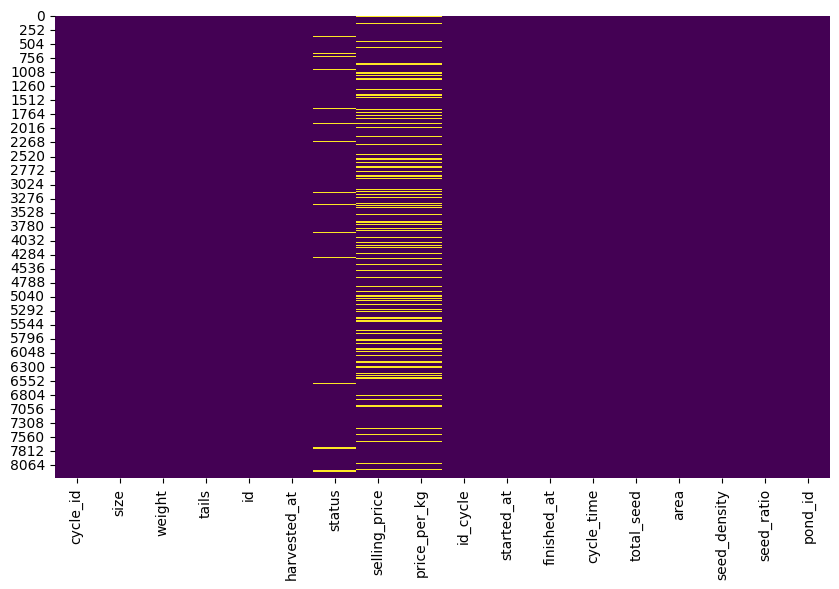

In [360]:
df_harvest_cycles = pd.merge(
    df_harvests, df_cycles,
    left_on='cycle_id', right_on='id',
    how='inner', suffixes=('', '_cycle')
)

plot_missin_data_heatmap(df_harvest_cycles, "")

In [418]:
df_harvest_cycles.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8087 entries, 0 to 8303
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype          
---  ------         --------------  -----          
 0   cycle_id       8087 non-null   int64          
 1   size           8087 non-null   float64        
 2   weight         8087 non-null   float64        
 3   tails          8087 non-null   float64        
 4   id             8087 non-null   float64        
 5   harvested_at   8087 non-null   object         
 6   status         7824 non-null   object         
 7   selling_price  6294 non-null   float64        
 8   price_per_kg   6282 non-null   float64        
 9   id_cycle       8087 non-null   int64          
 10  started_at     8087 non-null   datetime64[ns] 
 11  finished_at    8087 non-null   datetime64[ns] 
 12  cycle_time     8087 non-null   timedelta64[ns]
 13  total_seed     8087 non-null   int64          
 14  area           8087 non-null   float64        
 15  seed_dens

In [407]:
df_harvest_cycles.duplicated().any()

True

In [419]:
df_harvest_cycles = df_harvest_cycles.drop_duplicates(subset=['cycle_id', 'weight', 'harvested_at'], keep='first')
df_harvest_cycles.duplicated().any()

False

In [420]:
df_harvest_cycles.sort_values('cycle_id')

cycle_id   size   weight         tails       id harvested_at   status  \
4805      3458   94.0  1643.13  9.301595e+07   2053.0   2020-05-13  Partial   
4808      3458   41.0  3030.00  1.715253e+08   2286.0   2020-06-27     Full   
4807      3458   49.0  1206.00  6.827045e+07   2199.0   2020-06-13  Partial   
4806      3458   71.0  1503.80  8.512861e+07   2088.0   2020-05-26  Partial   
1924      3459   37.0  3144.18  1.779889e+08   2327.0   2020-07-06     Full   
...        ...    ...      ...           ...      ...          ...      ...   
2355     29659  200.0    60.00  3.396540e+06  27863.0   2024-03-14     Full   
2161     29679   50.6   241.00  1.364277e+07  28252.0   2024-03-28     Full   
2160     29679   61.4   127.00  7.189343e+06  28248.0   2024-03-12  Partial   
7726     29873   85.0  1038.00  5.876014e+07  28263.0   2024-03-25     Full   
3125     29874   70.0   661.50  3.744685e+07  28264.0   2024-03-25     Full   

      selling_price  price_per_kg  id_cycle started_at finished_at cycle_time  \
4805            NaN           NaN      3458 2020-03-07  2020-06-27   112 days   
4808            NaN           NaN      3458 2020-03-07  2020-06-27   112 days   
4807            NaN           NaN      3458 2020-03-07  2020-06-27   112 days   
4806            NaN           NaN      3458 2020-03-07  2020-06-27   112 days   
1924            NaN           NaN      3459 2020-03-07  2020-07-06   121 days   
...             ...           ...       ...        ...         ...        ...   
2355      2100000.0       35000.0     29659 2024-02-11  2024-03-14    32 days   
2161            NaN           NaN     29679 2024-02-15  2024-03-28    42 days   
2160            NaN           NaN     29679 2024-02-15  2024-03-28    42 days   
7726     57401400.0       55300.0     29873 2024-01-09  2024-03-25    76 days   
3125     39690000.0       60000.0     29874 2024-01-09  2024-03-25    76 days   

      total_seed    area  seed_density  seed_ratio  pond_id  
4805      566669  4968.0    114.063808  114.063808    12969  
4808      566669  4968.0    114.063808  114.063808    12969  
4807      566669  4968.0    114.063808  114.063808    12969  
4806      566669  4968.0    114.063808  114.063808    12969  
1924      566669  4968.0    114.063808  114.063808    12996  
...          ...     ...           ...         ...      ...  
2355       75000  2183.0     34.356390   34.356390    45493  
2161       26671    78.5    339.757962  339.757962    18522  
2160       26671    78.5    339.757962  339.757962    18522  
7726      125000   900.0    138.888889  138.888889    43651  
3125      125000   900.0    138.888889  138.888889    43654  

[7839 rows x 18 columns]

In [422]:
# perhitungan SR
# jika SR > 100% maka ada pertumbuhan jumlah udang selama siklus
# jika SR < 100% maka terjadi mortalitas / kematian yang tinggi

df = df_harvest_cycles[df_harvest_cycles['cycle_id'] == 29679]
round(df.tails.sum() / df.total_seed.mean(), 2) * 100

78108.0

# Modeling

## SR Prediction

## ADG Prediction

## Biomassa Prediction

## Reveneu Prediction

# Conclusion